### Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from CartPole import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from numpy.random import default_rng

from utilities import *

# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


## Task 1


### Task 1.1


In [56]:
# Equilibrium points

STABLE_POS = 0
STABLE_VEL = 0
STABLE_ANG = np.pi
STABLE_ANG_VEL = 0

UNSTABLE_POS = 0
UNSTABLE_VEL = 0
UNSTABLE_ANG = 0
UNSTABLE_ANG_VEL = 0


n = 6
POS_RANGE = np.linspace(POS_LOW, POS_HIGH, n)
VEL_RANGE = np.linspace(VEL_LOW, VEL_HIGH, n)
ANG_RANGE = np.linspace(ANG_LOW, ANG_HIGH, n)
ANG_VEL_RANGE = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

STEPS = 100
steps = np.arange(STEPS)
print(steps.shape)



(100,)


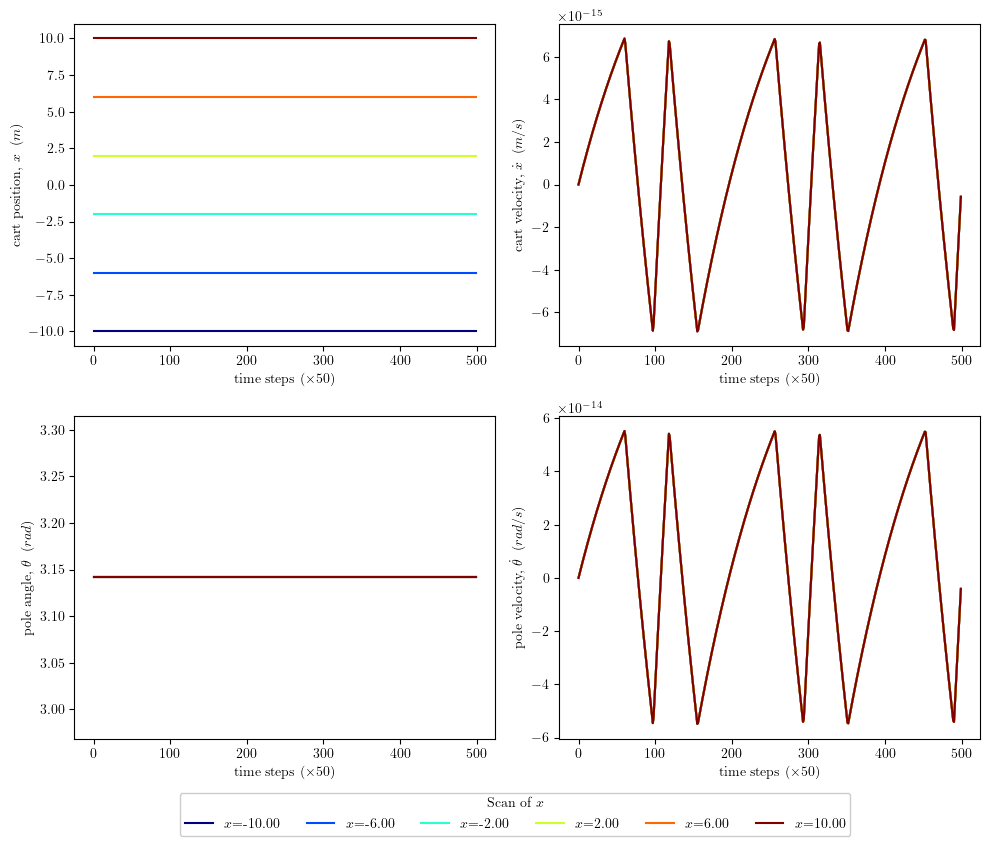

In [70]:
cp = CartPole(False)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
colors = plt.cm.jet(np.linspace(0, 1, n))

x = steps = np.arange(500)

for i, pos in enumerate(POS_RANGE):
    y = np.zeros(4)
    state = np.array([pos, STABLE_VEL, STABLE_ANG, STABLE_ANG_VEL])
    cp.setState(state)
    for _ in steps:
        y = np.vstack([y, cp.getState()])
        cp.performAction()
    y = y[1:, :]
    plot_states(x, y, fig=fig, axs=axs, xlabel=r"time steps ($\times 50$)", label=f"$x$={pos:.2f}", color=colors[i])
    cp.reset()

lgd = fig.legend(loc="lower center", ncol=n, framealpha=1, title="Scan of $x$", bbox_to_anchor=(0.52, -0.06))
fig.tight_layout()
fig.savefig("./assets/task1_1__0.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

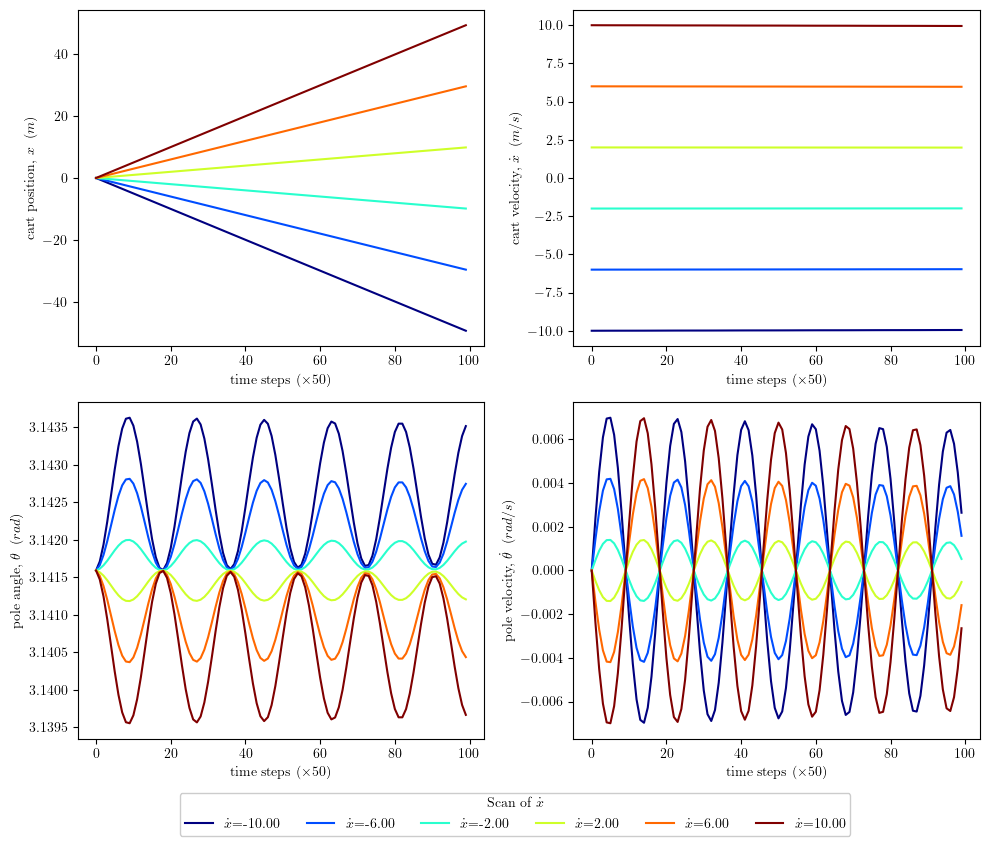

In [82]:
cp = CartPole(False)
cp.sim_steps = 1
cp.delta_time = 0.05
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
colors = plt.cm.jet(np.linspace(0, 1, n))

x = steps = np.arange(100)

for i, vel in enumerate(VEL_RANGE):
    y = np.zeros(4)
    state = np.array([STABLE_POS, vel, STABLE_ANG, STABLE_ANG_VEL])
    cp.setState(state)
    for _ in steps:
        y = np.vstack([y, cp.getState()])
        cp.performAction()
    y = y[1:, :]
    plot_states(x, y, fig=fig, axs=axs, xlabel=r"time steps ($\times 50$)", label=f"$\dot x$={vel:.2f}", color=colors[i])
    cp.reset()

lgd = fig.legend(loc="lower center", ncol=n, framealpha=1, title="Scan of $\dot x$", bbox_to_anchor=(0.52, -0.06))
fig.tight_layout()

fig.savefig("./assets/task1_1__1.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

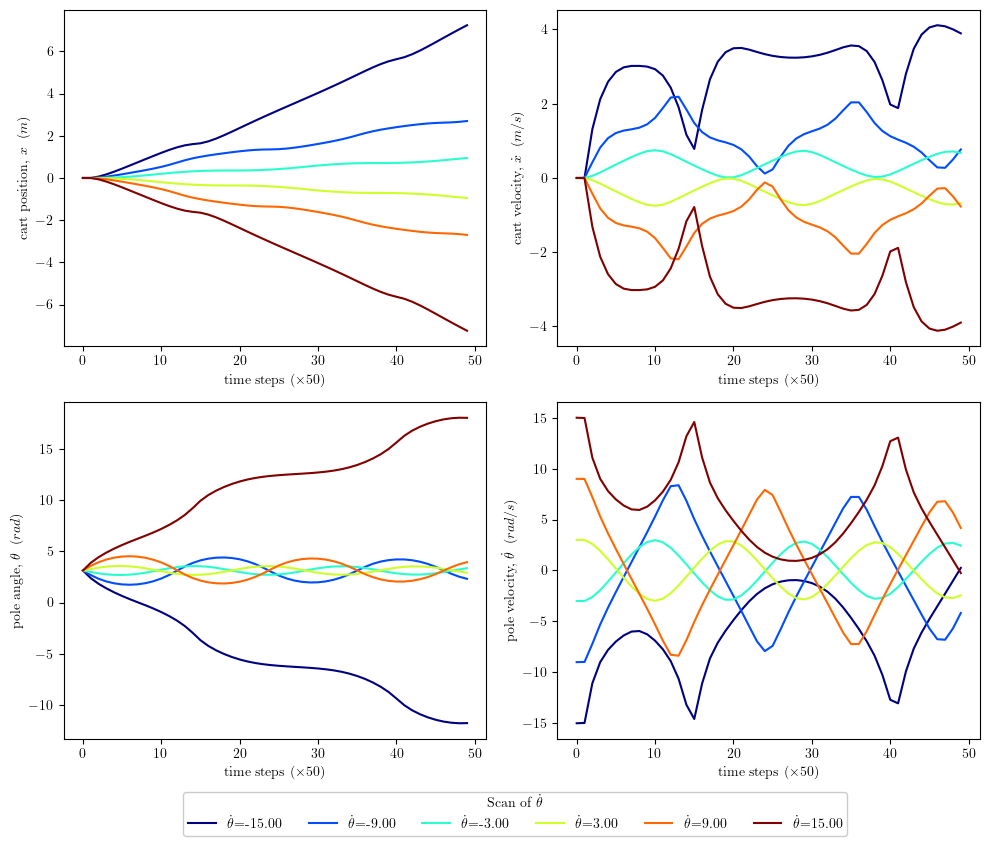

In [83]:
cp = CartPole(False)
cp.sim_steps = 1
cp.delta_time = 0.05
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
colors = plt.cm.jet(np.linspace(0, 1, n))

x = steps = np.arange(50)

for i, ang_vel in enumerate(ANG_VEL_RANGE):
    y = np.zeros(4)
    state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, ang_vel])
    cp.setState(state)
    for _ in steps:
        y = np.vstack([y, cp.getState()])
        cp.performAction()
    y = y[1:, :]
    plot_states(x, y, fig=fig, axs=axs, xlabel=r"time steps ($\times 50$)", label=f"$\dot \\theta$={ang_vel:.2f}", color=colors[i])
    cp.reset()

lgd = fig.legend(loc="lower center", ncol=n, framealpha=1, title="Scan of $\dot \\theta$", bbox_to_anchor=(0.52, -0.06))
fig.tight_layout()
fig.savefig("./assets/task1_1__2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


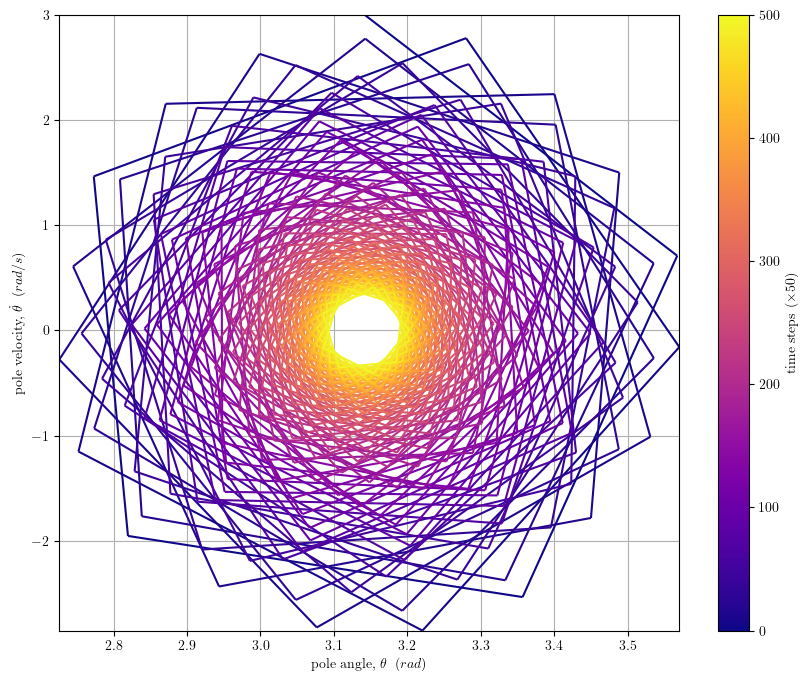

In [29]:
# Simple oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 3])
response = np.zeros(4)

cp = CartPole(False)
cp.setState(state)

for _ in steps:
    response = np.vstack([response, cp.getState()])
    cp.performAction()

x00 = response[1:, 2]
y00 = response[1:, 3]

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments0 = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc0 = LineCollection(segments0, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc0.set_array(steps)
line = ax.add_collection(lc0)
fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')

ax.set_xlim(x00.min(), x00.max())
ax.set_ylim(y00.min(), y00.max())

ax.set_xlabel(STATE2)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_1__3.png")

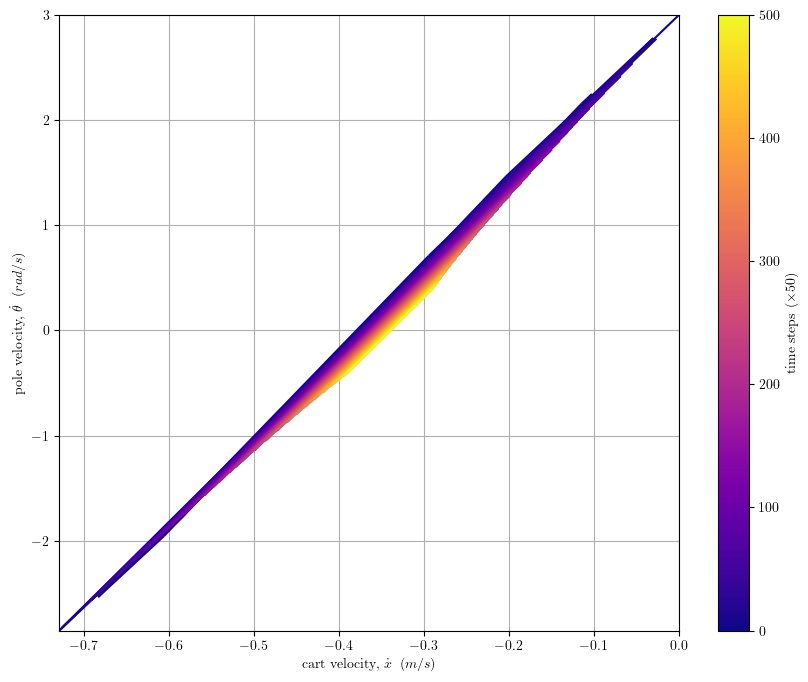

In [30]:
x01 = response[1:, 1]
y01 = response[1:, 3]

points = np.array([x01, y01]).T.reshape(-1, 1, 2)
segments1 = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc1 = LineCollection(segments1, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc1.set_array(steps)
line = ax.add_collection(lc1)
fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')

ax.set_xlim(x01.min(), x01.max())
ax.set_ylim(y01.min(), y01.max())

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_1__4.png")

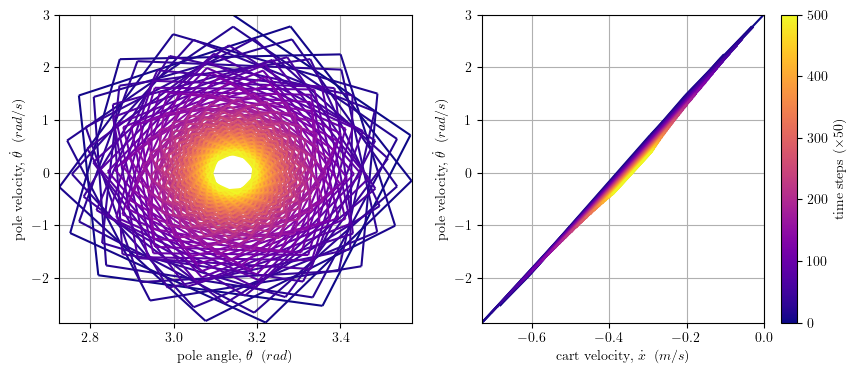

In [31]:
# Combine state trajectories together
n_steps = 500
steps = np.arange(n_steps)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

norm = plt.Normalize(0, n_steps)

lc0 = LineCollection(segments0, cmap='plasma', norm=norm)
lc0.set_array(steps)
line0 = axs[0].add_collection(lc0)
lc1 = LineCollection(segments1, cmap='plasma', norm=norm)
lc1.set_array(steps)
line1 = axs[1].add_collection(lc1)

fig.colorbar(line0, ax=ax, label=r'time steps $(\times 50)$')
fig.colorbar(line1, ax=ax, label=r'time steps $(\times 50)$')

axs[0].set_xlim(x00.min(), x00.max())
axs[0].set_ylim(y00.min(), y00.max())

axs[1].set_xlim(x01.min(), x01.max())
axs[1].set_ylim(y01.min(), y01.max())

axs[0].set_xlabel(STATE2)
axs[0].set_ylabel(STATE3)
axs[1].set_xlabel(STATE1)
axs[1].set_ylabel(STATE3)

axs[0].grid()
axs[1].grid()

fig.colorbar(line1, ax=axs[1], label=r'time steps $(\times 50)$')

fig.savefig("./assets/task1_1__10.png")

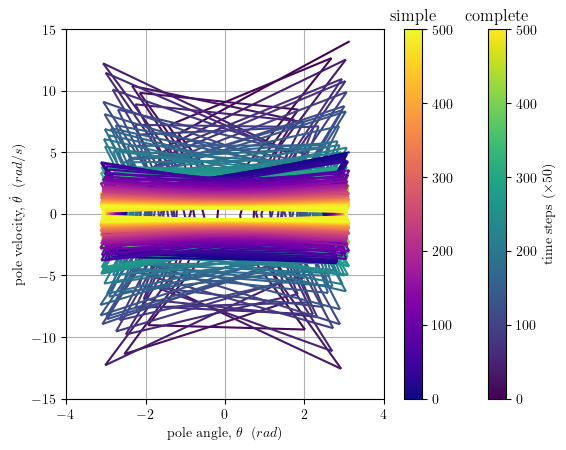

In [114]:
# Large oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 14])
response = np.zeros(4)

cp = CartPole(False)
cp.setState(state)

for _ in steps:
    t = cp.getState()
    t[2] = remap_angle(t[2])
    response = np.vstack([response, t])
    cp.performAction()

x10 = response[1:, 2]
y10 = response[1:, 3]

points = np.array([x10, y10]).T.reshape(-1, 1, 2)
segments0 = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(1, 1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc0 = LineCollection(segments0, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc0.set_array(steps)
line = ax.add_collection(lc0)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('complete')



points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('simple')

ax.set_xlim(-4, 4)
ax.set_ylim(-15, 15)

ax.set_xlabel(STATE2)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_1__5.png")

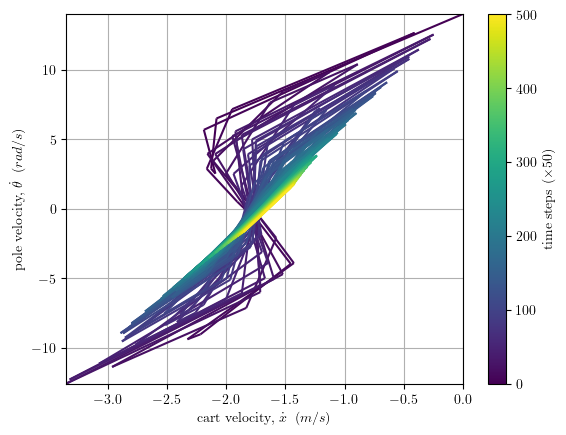

In [116]:
x11 = response[1:, 1]
y11 = response[1:, 3]

points = np.array([x11, y11]).T.reshape(-1, 1, 2)
segments1 = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(1, 1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc1 = LineCollection(segments1, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc1.set_array(steps)
line = ax.add_collection(lc1)
fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')

ax.set_xlim(x11.min(), x11.max())
ax.set_ylim(y11.min(), y11.max())

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_1__6.png")

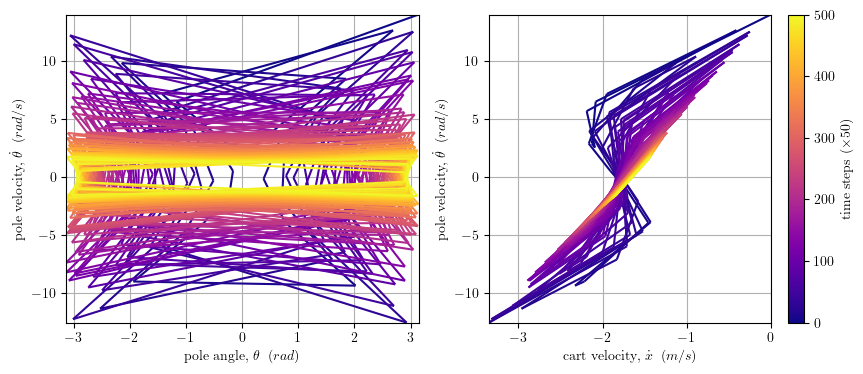

In [117]:
# Combine state trajectories together
n_steps = 500
steps = np.arange(n_steps)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

norm = plt.Normalize(0, n_steps)

lc0 = LineCollection(segments0, cmap='plasma', norm=norm)
lc0.set_array(steps)
line0 = axs[0].add_collection(lc0)
lc1 = LineCollection(segments1, cmap='plasma', norm=norm)
lc1.set_array(steps)
line1 = axs[1].add_collection(lc1)

fig.colorbar(line0, ax=ax, label=r'time steps $(\times 50)$')
fig.colorbar(line1, ax=ax, label=r'time steps $(\times 50)$')

axs[0].set_xlim(x10.min(), x10.max())
axs[0].set_ylim(y10.min(), y10.max())

axs[1].set_xlim(x11.min(), x11.max())
axs[1].set_ylim(y11.min(), y11.max())

axs[0].set_xlabel(STATE2)
axs[0].set_ylabel(STATE3)
axs[1].set_xlabel(STATE1)
axs[1].set_ylabel(STATE3)

axs[0].grid()
axs[1].grid()

fig.colorbar(line1, ax=axs[1], label=r'time steps $(\times 50)$')

fig.savefig("./assets/task1_1__11.png")

### Task 1.2

In [85]:
rng = default_rng(10)
POS = rng.random()
VEL = rng.random() * (VEL_HIGH - VEL_LOW) + VEL_LOW
ANG = rng.random() * (ANG_HIGH - ANG_LOW) + ANG_LOW
ANG_VEL = rng.random() * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW

print(f"{POS:.2f}, {VEL:.2f}, {ANG:.2f}, {ANG_VEL:.2f}")


0.96, -5.85, 2.06, -10.52


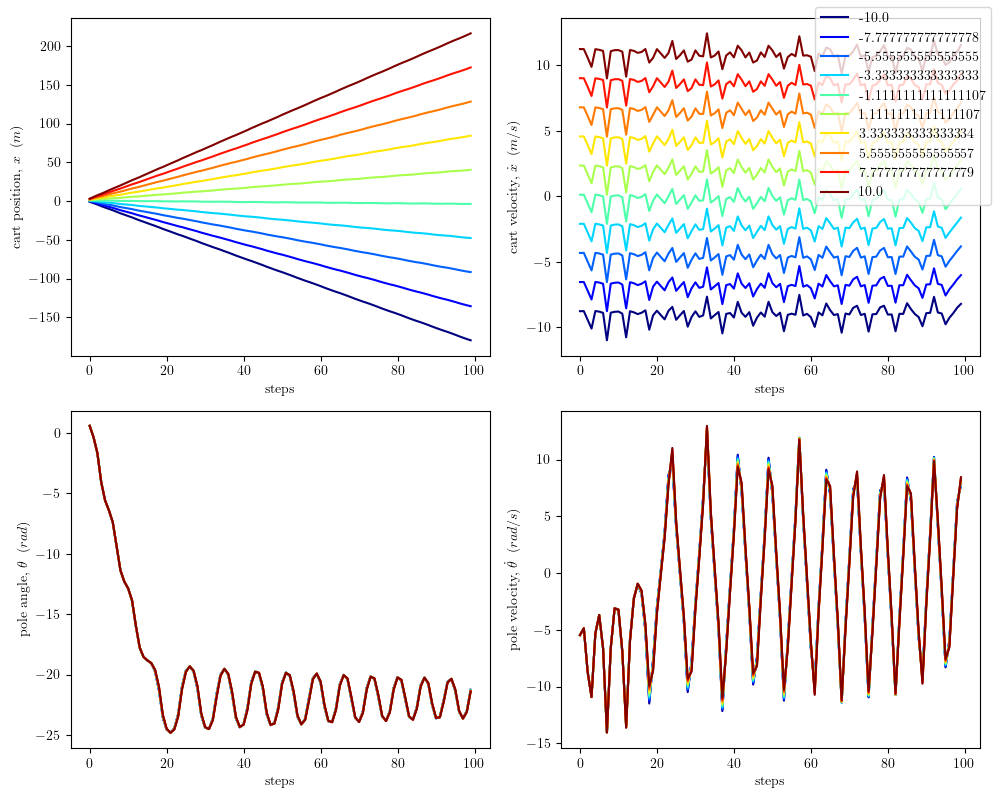

In [36]:
# To sanity check that the state varies linearly with the state for one time step
# Plot below evalualted with 3 time steps

n = 10
cp = CartPole(False)
steps = x = np.arange(0, STEPS)
vels = np.linspace(VEL_LOW, VEL_HIGH, n)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
colors = plt.cm.jet(np.linspace(0,1,n))

for i, vel in enumerate(vels):
    y = np.zeros(4)
    state = np.array([POS, vel, ANG, ANG_VEL])
    cp.setState(state)
    for _ in steps:
        cp.performAction()
        y = np.vstack([y, cp.getState()])
    y = y[1:, :]
    plot_states(x, y, fig=fig, axs=axs, xlabel="steps", label=vel, color=colors[i])
    cp.reset()

fig.legend(loc="upper right")
fig.tight_layout()



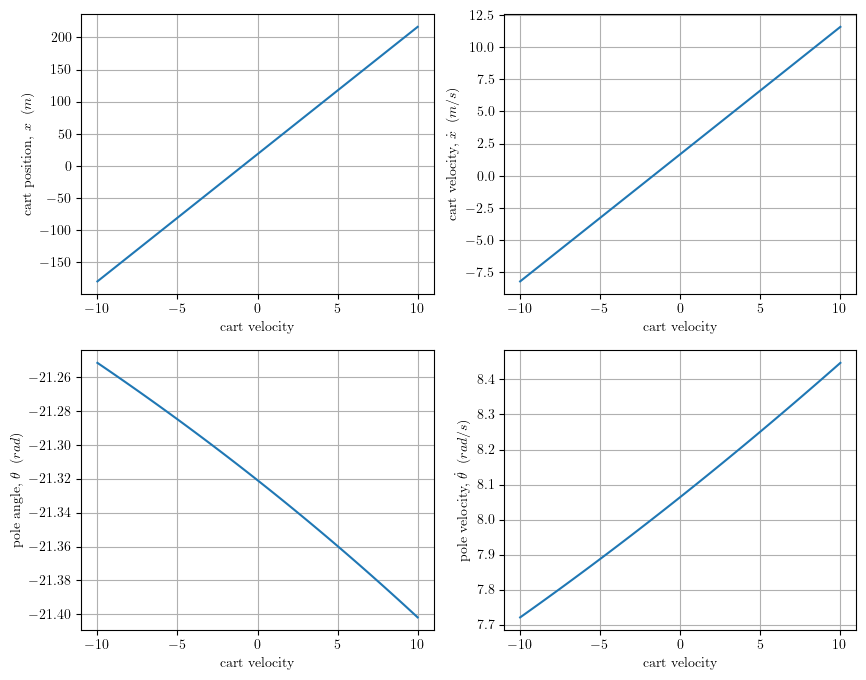

In [37]:
n = 50
cp = CartPole(False)
x = vels = np.linspace(VEL_LOW, VEL_HIGH, n)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

y = np.zeros(4)

for vel in vels:
    state = np.array([POS, vel, ANG, ANG_VEL])
    cp.setState(state)
    [cp.performAction() for _ in range(STEPS)]
    y = np.vstack([y, cp.getState()])
    cp.reset()
    
y = y[1:, :]

plot_states(x, y, fig=fig, axs=axs, xlabel="cart velocity")
fig.savefig("./assets/task1_2__1.png")

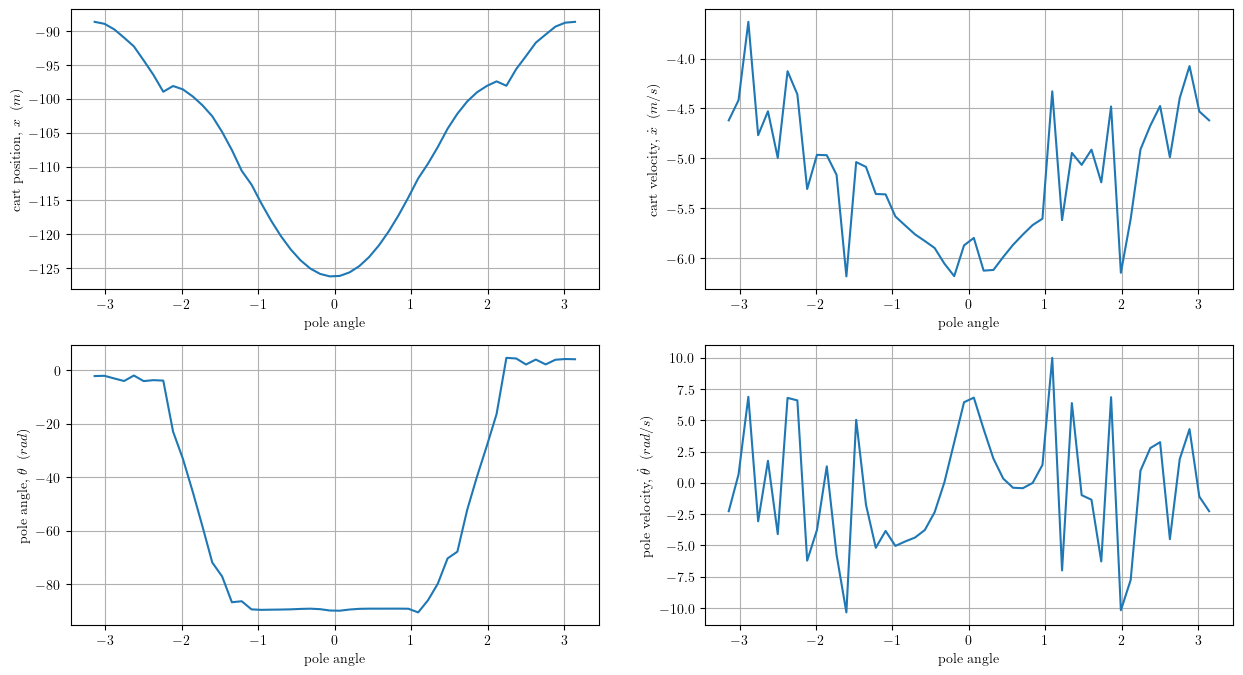

In [38]:
n = 50
cp = CartPole(False)
x = angs = np.linspace(ANG_LOW, ANG_HIGH, n)

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

y = np.zeros(4)

for ang in angs:
    state = np.array([POS, VEL, ang, ANG_VEL])
    cp.setState(state)
    [cp.performAction() for _ in range(STEPS)]
    y = np.vstack([y, cp.getState()])
    cp.reset()
    
y = y[1:, :]

plot_states(x, y, fig=fig, axs=axs, xlabel="pole angle")
fig.savefig("./assets/task1_2__2.png")


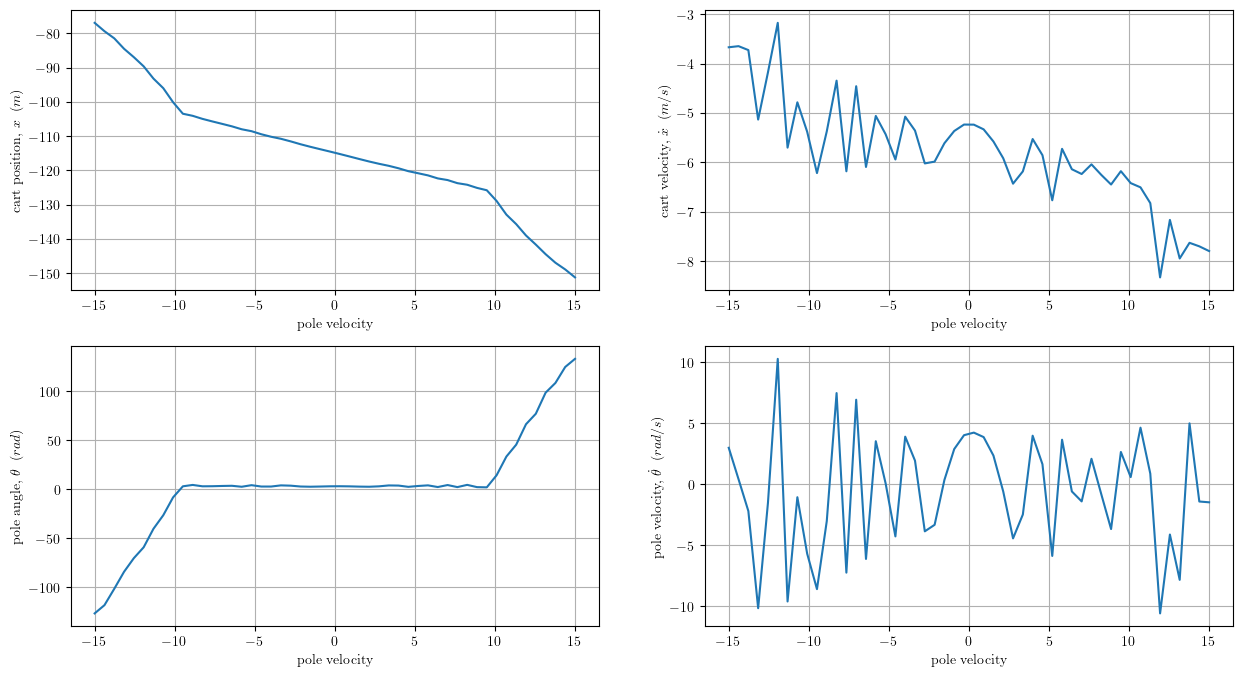

In [39]:
n = 50
cp = CartPole(False)
x = ang_vels = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

y = np.zeros(4)

for ang_vel in ang_vels:
    state = np.array([POS, VEL, ANG, ang_vel])
    cp.setState(state)
    [cp.performAction() for _ in range(STEPS)]
    y = np.vstack([y, cp.getState()])
    cp.reset()
    
y = y[1:, :]

plot_states(x, y, fig=fig, axs=axs, xlabel="pole velocity")
fig.savefig("./assets/task1_2__3.png")



[0.9560017096289753, -5.846363798417062, 2.063680077375216, -10.521536307539392]


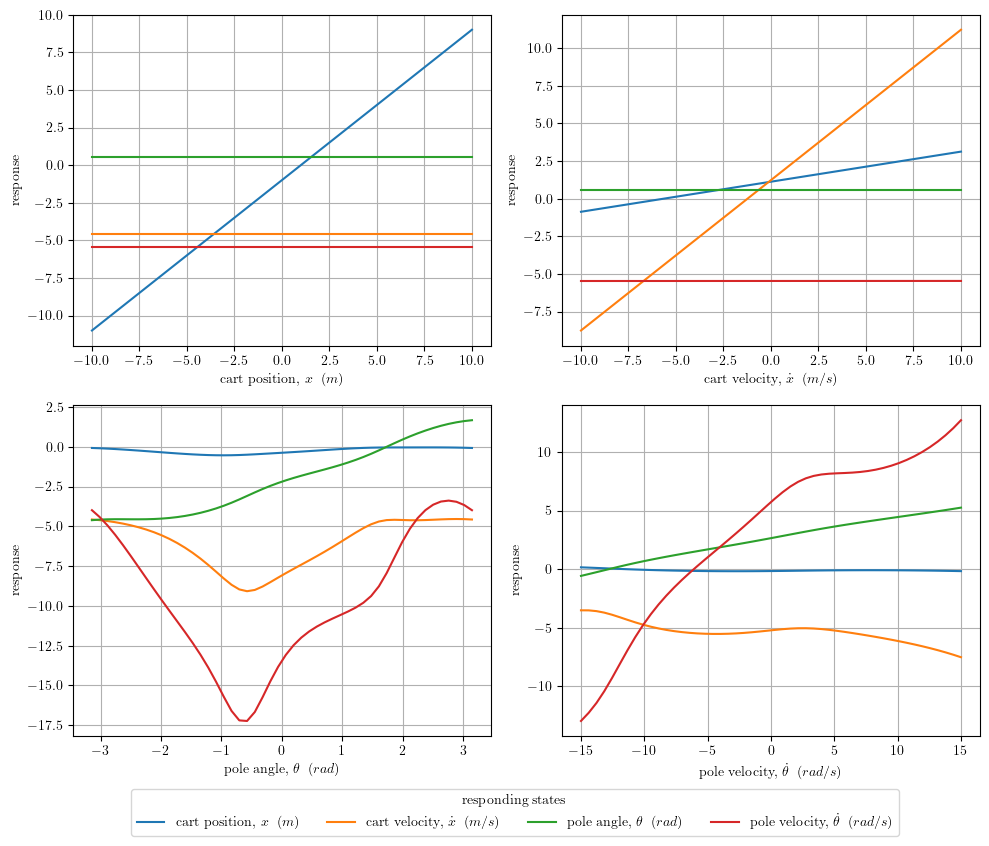

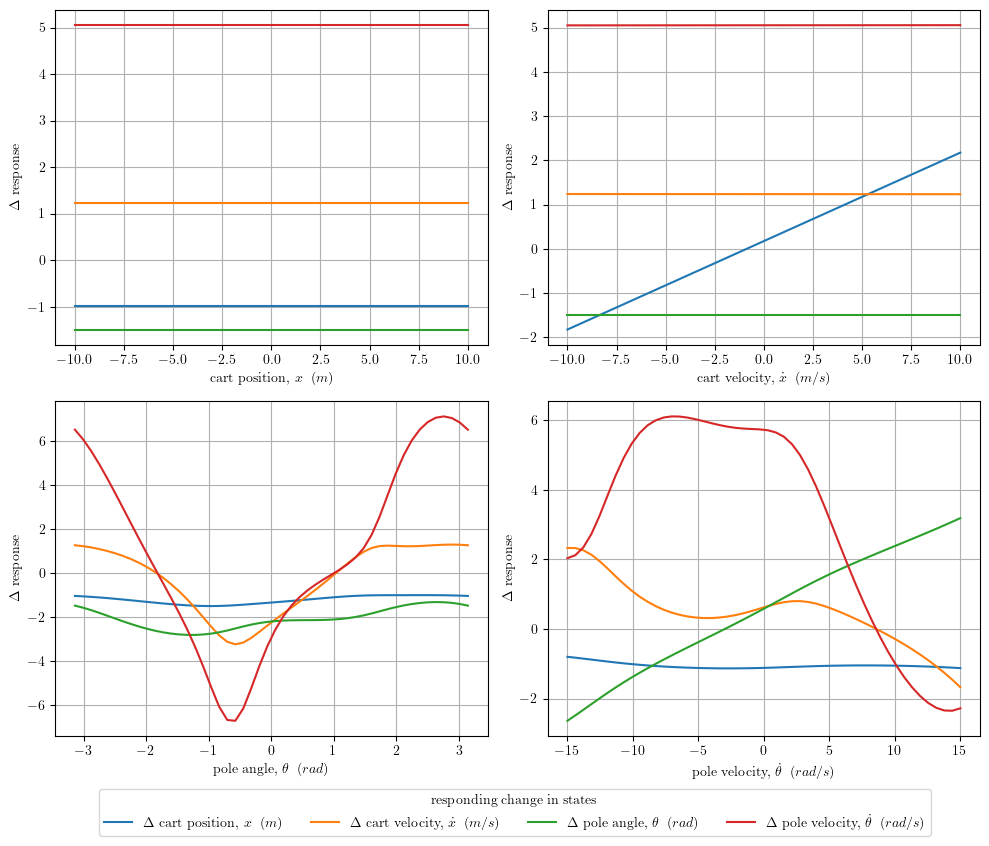

In [86]:
# Model change instead
n = 50

fig1, axs1 = plt.subplots(2, 2, figsize=(10, 8))
fig2, axs2 = plt.subplots(2, 2, figsize=(10, 8)) # measure change
x0 = poss = np.linspace(POS_LOW, POS_HIGH, n)
x1 = vels = np.linspace(VEL_LOW, VEL_HIGH, n)
x2 = angs = np.linspace(ANG_LOW, ANG_HIGH, n)
x3 = ang_vels = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

xlabels = [STATE0, STATE1, STATE2, STATE3]
print([POS, VEL, ANG, ANG_VEL])
for i, x in enumerate([x0, x1, x2, x3]):  
    cp = CartPole(False)
    y1 = np.zeros(4)
    y2 = np.zeros(4)

    for var in x:
        state = [POS, VEL, ANG, ANG_VEL]
        state[i] = var
        y0 = np.array(state)
        cp.setState(y0)
        [cp.performAction() for _ in range(1)]
        y1 = np.vstack([y1, cp.getState()])
        y2 = np.vstack([y2, cp.getState() - y0])
        cp.reset()
    
    y1 = y1[1:, :]
    y2 = y2[1:, :]
    ax1 = axs1[i // 2][i % 2]
    ax2 = axs2[i // 2][i % 2]
    plot_all_states_in_a_subplot(x, y1, fig=fig1, ax=ax1, xlabel=xlabels[i], ylabel="response")
    plot_all_states_in_a_subplot(x, y2, fig=fig2, ax=ax2, xlabel=xlabels[i], ylabel=f"{DELTA} response")


# fig1.legend(xlabels)
# fig2.legend(xlabels)
# fig1.tight_layout()
# fig2.tight_layout()

lgd = fig1.legend(loc="lower center", ncol=4, labels=xlabels, bbox_to_anchor=(0.52, -0.06), title="responding states")
fig1.tight_layout()
fig1.savefig("./assets/task1_2__4.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


lgd = fig2.legend(loc="lower center", ncol=4, labels=[DELTA + l for l in xlabels], bbox_to_anchor=(0.52, -0.06), title="responding change in states")
fig2.tight_layout()
fig2.savefig("./assets/task1_2__5.png",bbox_extra_artists=(lgd,), bbox_inches='tight')

In [70]:
n = 500

poss = np.linspace(POS_LOW, POS_HIGH, n)
vels = np.linspace(VEL_LOW, VEL_HIGH, n)
angs = np.linspace(ANG_LOW, ANG_HIGH, n)
ang_vels = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:113: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  cntr1 = axs[0, 0].contourf(x, y, z0, linestyles='solid', negative_linestyles='dashed', levels=levels)
/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:114: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  cntr2 = axs[0, 1].contourf(x, y, z1, linestyles='solid', negative_linestyles='dashed', levels=levels)
/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:115: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  cntr3 = axs[1, 0].contourf(x, y, z2, linestyles='solid', negative_linestyles='dashed', levels=levels)
/Users/chongzhen

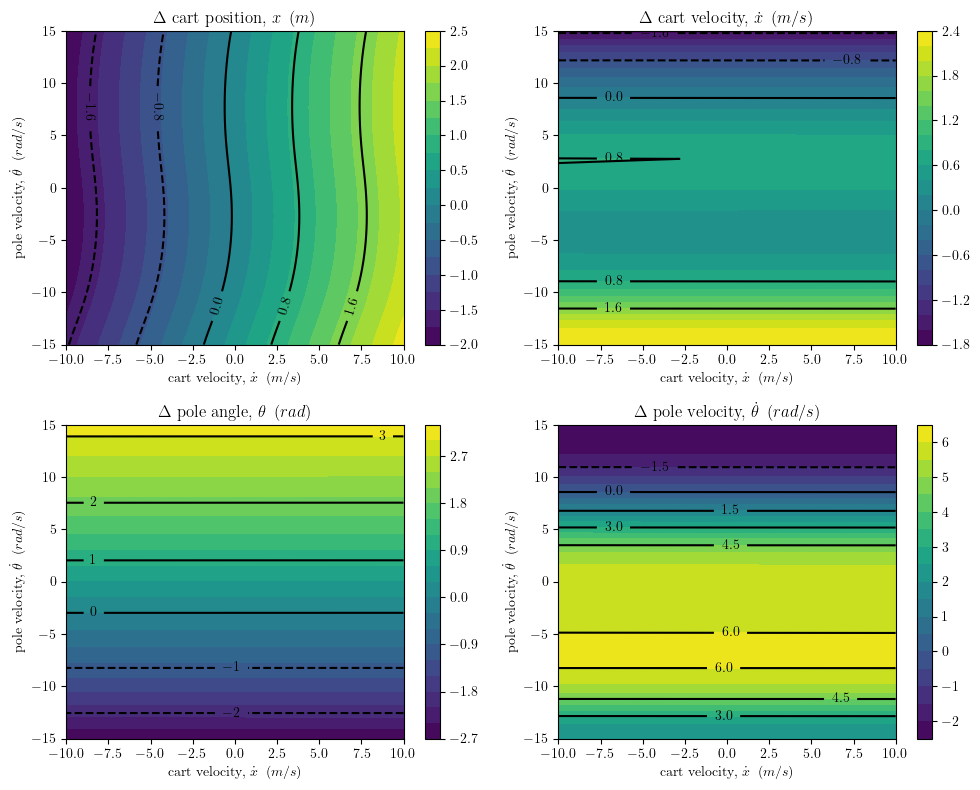

In [124]:

cp = CartPole(False)
x, y = np.meshgrid(vels, ang_vels, indexing='ij')
z = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, x[i][j], ANG, y[i][j]])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(10, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE1, ylabel=STATE3, xlim=xlim, ylim=ylim, colors='black')

fig.tight_layout()
fig.savefig("./assets/task1_2__6.png")


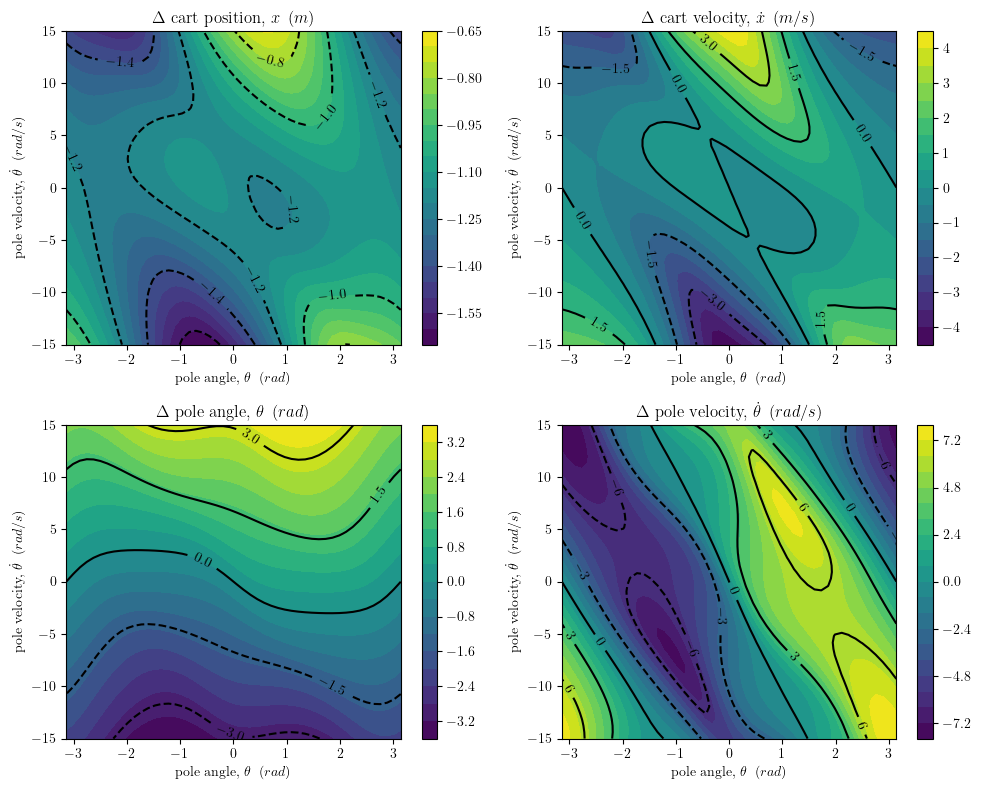

In [43]:
x, y = np.meshgrid(angs, ang_vels, indexing='ij')
z = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, VEL, x[i][j], y[i][j]])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(10, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE2, ylabel=STATE3, xlim=xlim, ylim=ylim, colors='black')

fig.tight_layout()
fig.savefig("./assets/task1_2__7.png")


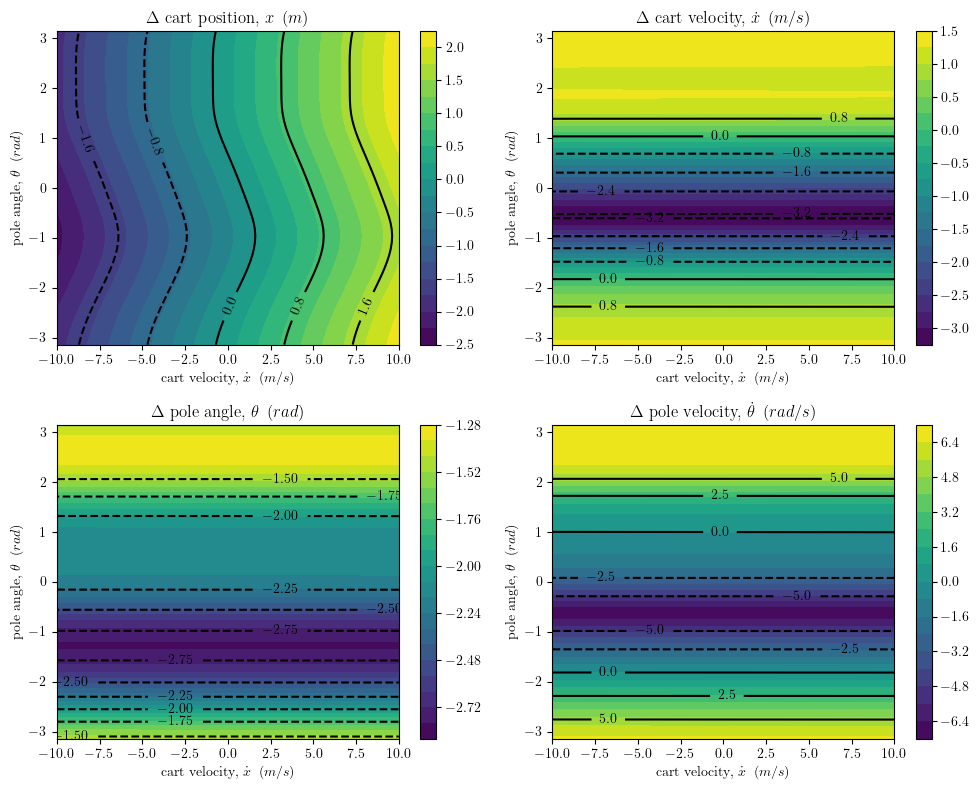

In [128]:
cp = CartPole(False)

x, y = np.meshgrid(vels, angs, indexing='ij')
z = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, x[i][j], y[i][j], ANG_VEL])
        cp.setState(z0)
        cp.performAction()
        t = cp.getState()
        # t[2] = remap_angle(t[2])
        z = np.vstack([z, t - z0])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(10, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE1, ylabel=STATE2, xlim=xlim, ylim=ylim, colors='black')

fig.tight_layout()
fig.savefig("./assets/task1_2__8.png")


### Task 1.3

In [4]:
n = 500
rng = default_rng(10)

X0 = rng.random(n) * (POS_HIGH - POS_LOW) + POS_LOW
X1 = rng.random(n) * (VEL_HIGH - VEL_LOW) + VEL_LOW
X2 = rng.random(n) * (ANG_HIGH - ANG_LOW) + ANG_LOW
X3 = rng.random(n) * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW

angs = np.linspace(ANG_LOW, ANG_HIGH, n)
vels = np.linspace(VEL_LOW, VEL_HIGH, n)
ang_vels = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

In [96]:
def simulate(X):
    cp = CartPole(False)
    cp.setState(X)
    cp.performAction()
    return cp.getState() - X

X = np.array([X0, X1, X2, X3]).T
Y = np.apply_along_axis(simulate, axis=1, arr=X)
print(X[0])

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3825945343.py, line 9)

In [88]:
# Optimal weights

W = np.linalg.inv(X.T @ X) @ X.T @ Y
W.shape


(4, 4)

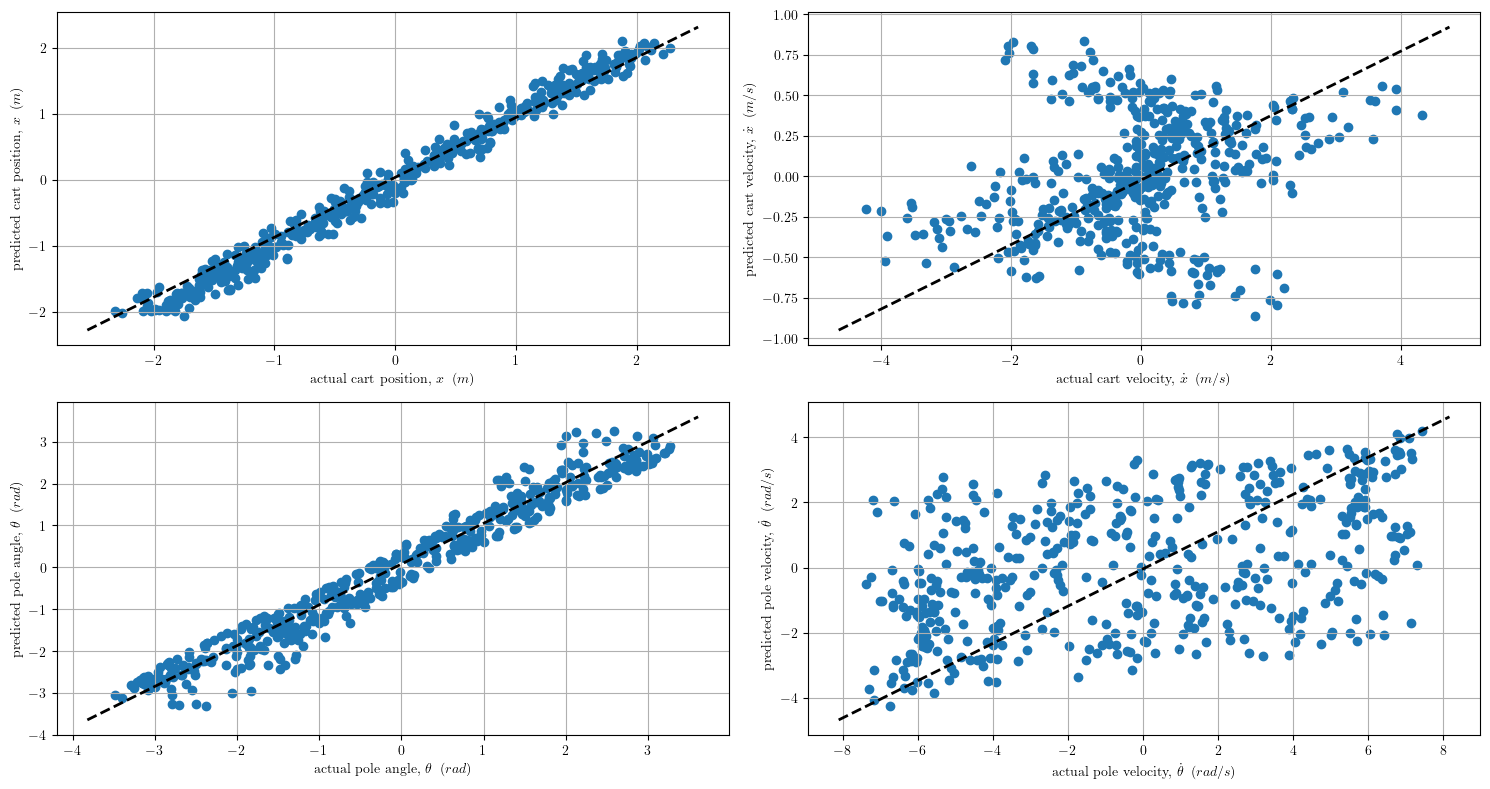

In [89]:
X_hat = X @ W
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

labels = [STATE0, STATE1, STATE2, STATE3]
xlabels = ["actual " + l for l in labels]
ylabels = ["predicted " + l for l in labels]
plot_scatter(x=Y, y=X_hat, fig=fig, axs=axs, ylabels=ylabels, xlabels=xlabels)
fig.tight_layout()
fig.savefig("./assets/task1_3__1.png")

In [60]:
s = Y.shape[0]
e = X_hat - Y
mse = np.sum(e.T @ e, axis=0) / s
rmse = np.sqrt(mse)
print(rmse)

[0.72950284 2.49158449 1.32339418 4.5510756 ]


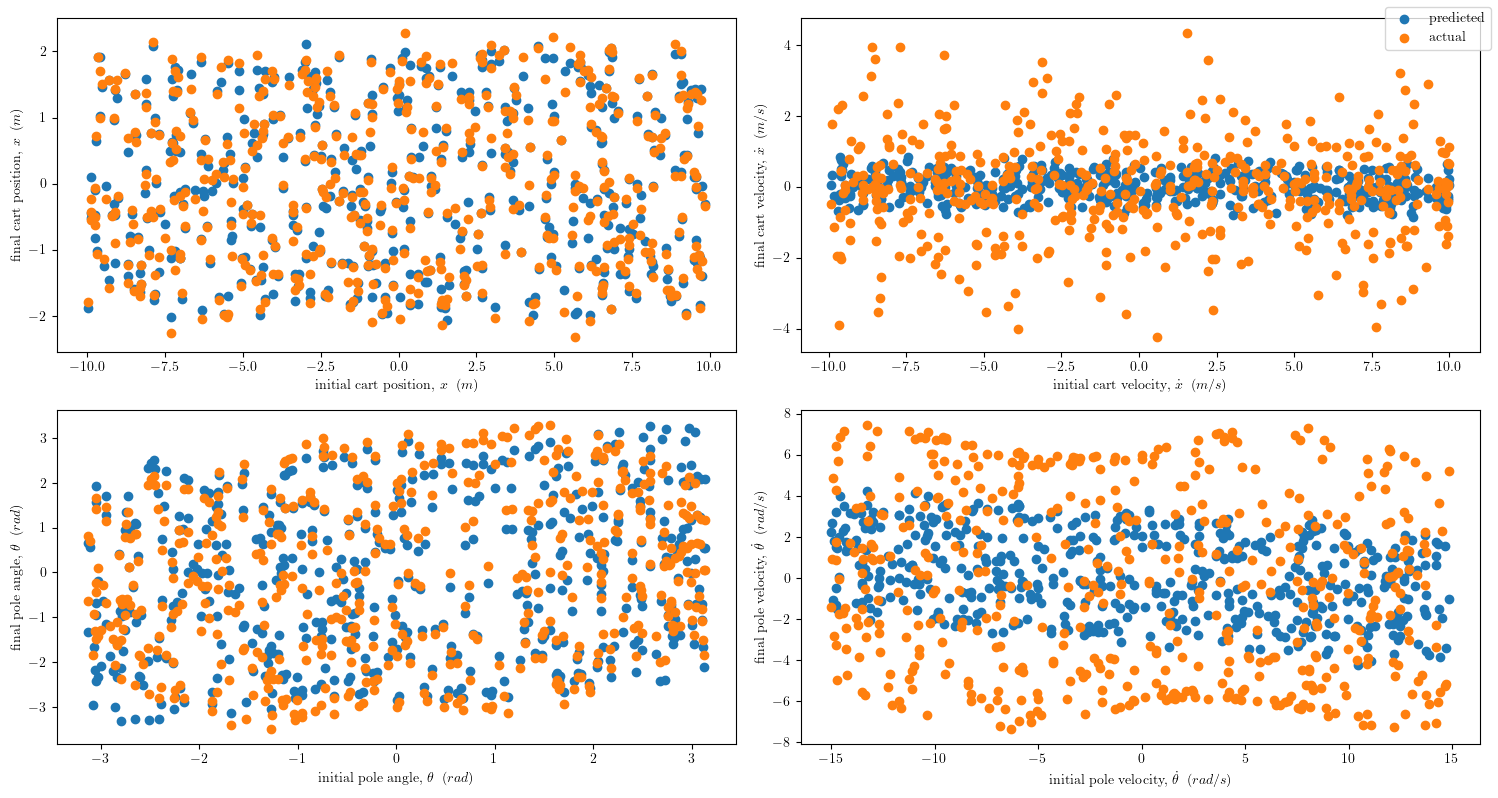

In [8]:
X_hat = X @ W
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

ylabels = ["final " + l for l in [STATE0, STATE1, STATE2, STATE3]]
xlabels = ["initial " + l for l in [STATE0, STATE1, STATE2, STATE3]]
plot_scatter(x=X, y=X_hat, fig=fig, axs=axs, xlabels=xlabels, ylabels=ylabels, diag=False, label='predicted')
plot_scatter(x=X, y=Y, fig=fig, axs=axs, xlabels=xlabels, ylabels=ylabels, diag=False, label='actual')
fig.legend()
fig.tight_layout()
fig.savefig("./assets/task1_3__10.png")

In [65]:
x, y = np.meshgrid(angs, ang_vels, indexing='ij')
z = np.zeros(4)
z_hat = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, VEL, x[i][j], y[i][j]])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        z_hat = np.vstack([z_hat, z0 @ W])
        cp.reset()



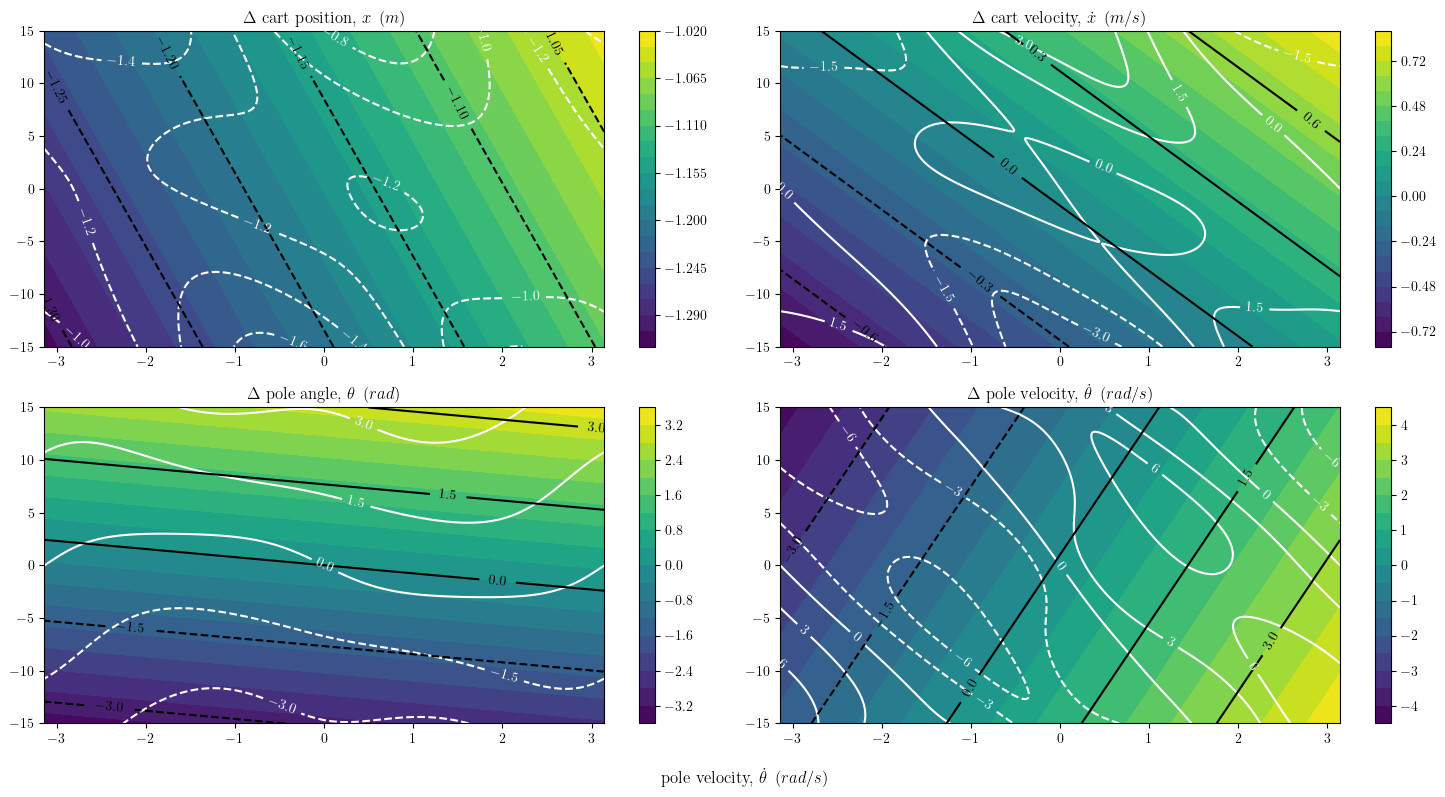

In [66]:
fig, axs = plt.subplots(2,2, figsize=(15, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlim=xlim, ylim=ylim, colors='white')
plot_states_contour(x, y, z_hat, fig, axs, xlim=xlim, ylim=ylim, colors='black')

fig.supxlabel(STATE2)
fig.supxlabel(STATE3)
fig.tight_layout()
fig.savefig("./assets/task1_3__2.png")

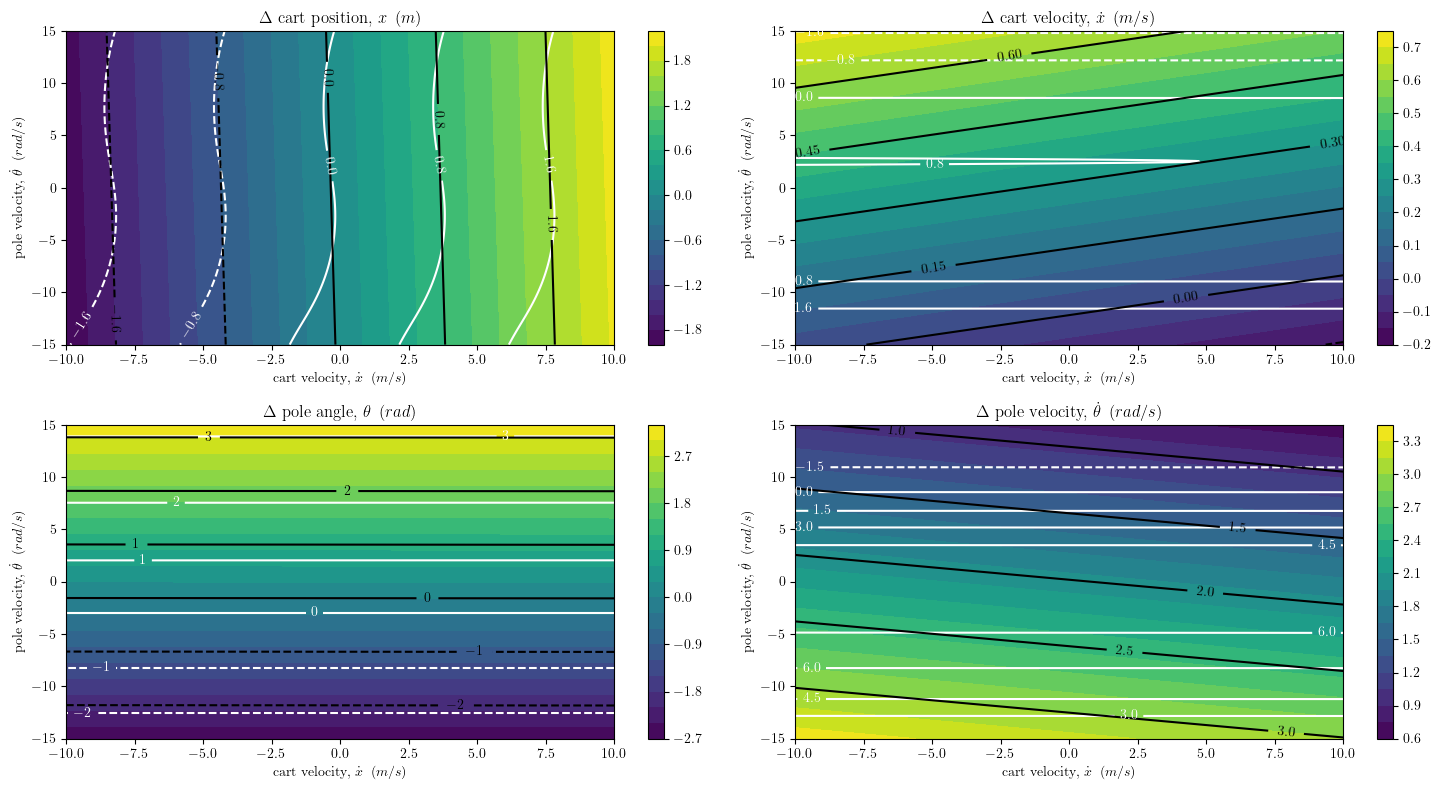

In [67]:
x, y = np.meshgrid(vels, ang_vels, indexing='ij')
z = np.zeros(4)
z_hat = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, x[i][j], ANG, y[i][j]])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        z_hat = np.vstack([z_hat, z0 @ W])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(15, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE1, ylabel=STATE3, xlim=xlim, ylim=ylim, colors='white')
plot_states_contour(x, y, z_hat, fig, axs, xlabel=STATE1, ylabel=STATE3, xlim=xlim, ylim=ylim, colors='black')

fig.tight_layout()
fig.savefig("./assets/task1_3__3.png")


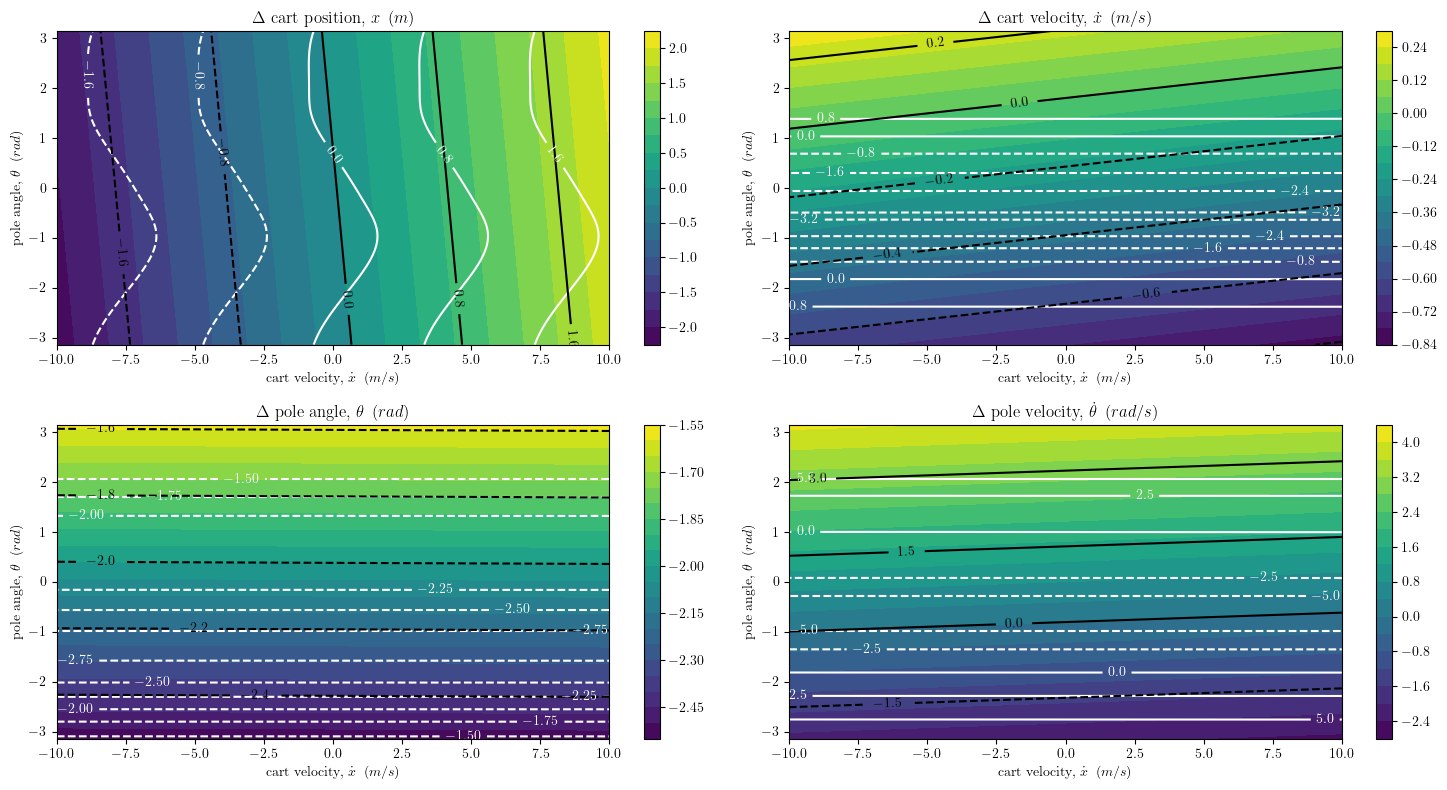

In [68]:
x, y = np.meshgrid(vels, angs, indexing='ij')
z = np.zeros(4)
z_hat = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, x[i][j], y[i][j], ANG_VEL])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        z_hat = np.vstack([z_hat, z0 @ W])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(15, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE1, ylabel=STATE2, xlim=xlim, ylim=ylim, colors='white')
plot_states_contour(x, y, z_hat, fig, axs, xlabel=STATE1, ylabel=STATE2, xlim=xlim, ylim=ylim, colors='black')

fig.tight_layout()
fig.savefig("./assets/task1_3__4.png")


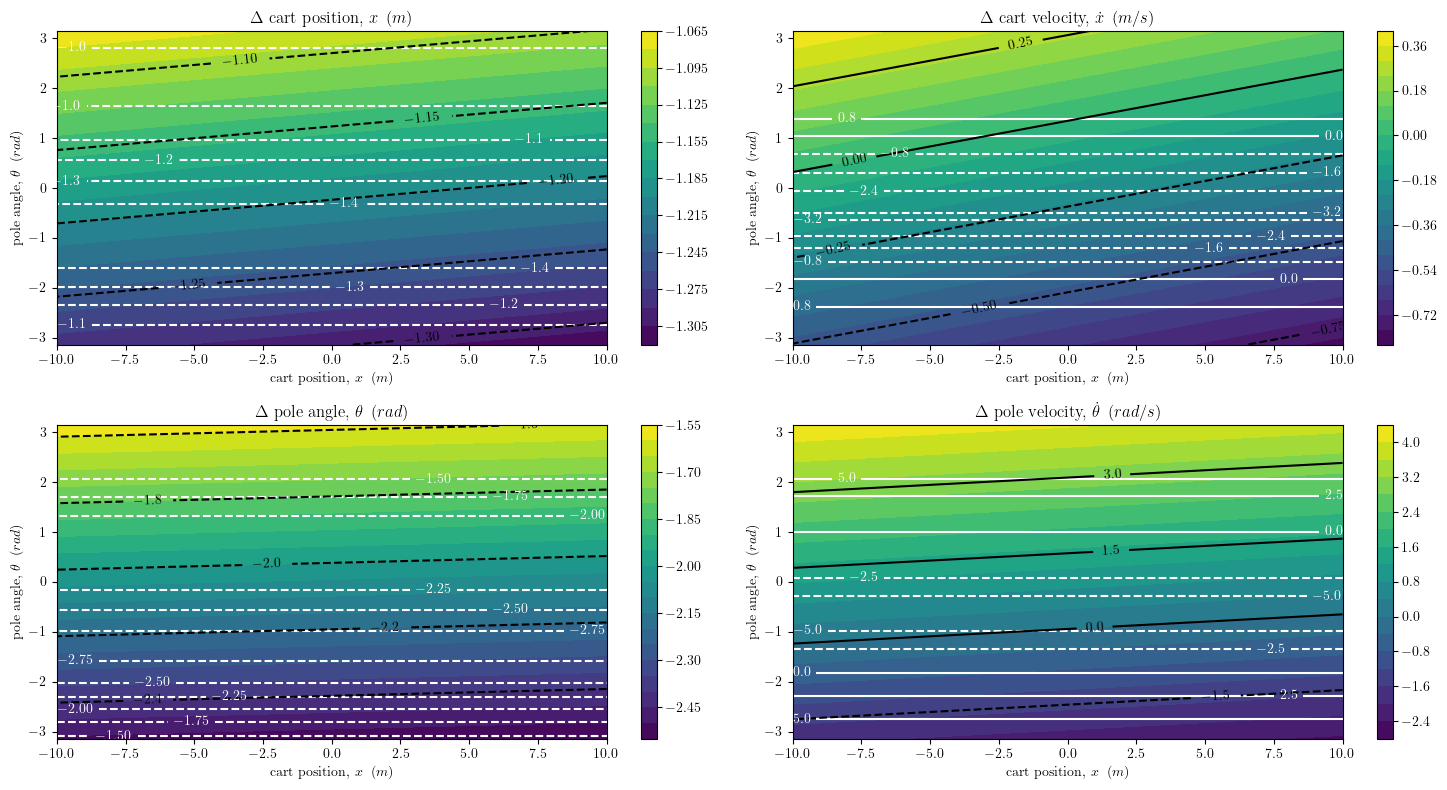

In [71]:
x, y = np.meshgrid(poss, angs, indexing='ij')
z = np.zeros(4)
z_hat = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([x[i][j], VEL, y[i][j], ANG_VEL])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        z_hat = np.vstack([z_hat, z0 @ W])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(15, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE0, ylabel=STATE2, xlim=xlim, ylim=ylim, colors='white')
plot_states_contour(x, y, z_hat, fig, axs, xlabel=STATE0, ylabel=STATE2, xlim=xlim, ylim=ylim, colors='black')

fig.tight_layout()
fig.savefig("./assets/task1_3__5.png")


[0.9560017096289753, -5.846363798417062, 2.063680077375216, -10.521536307539392]


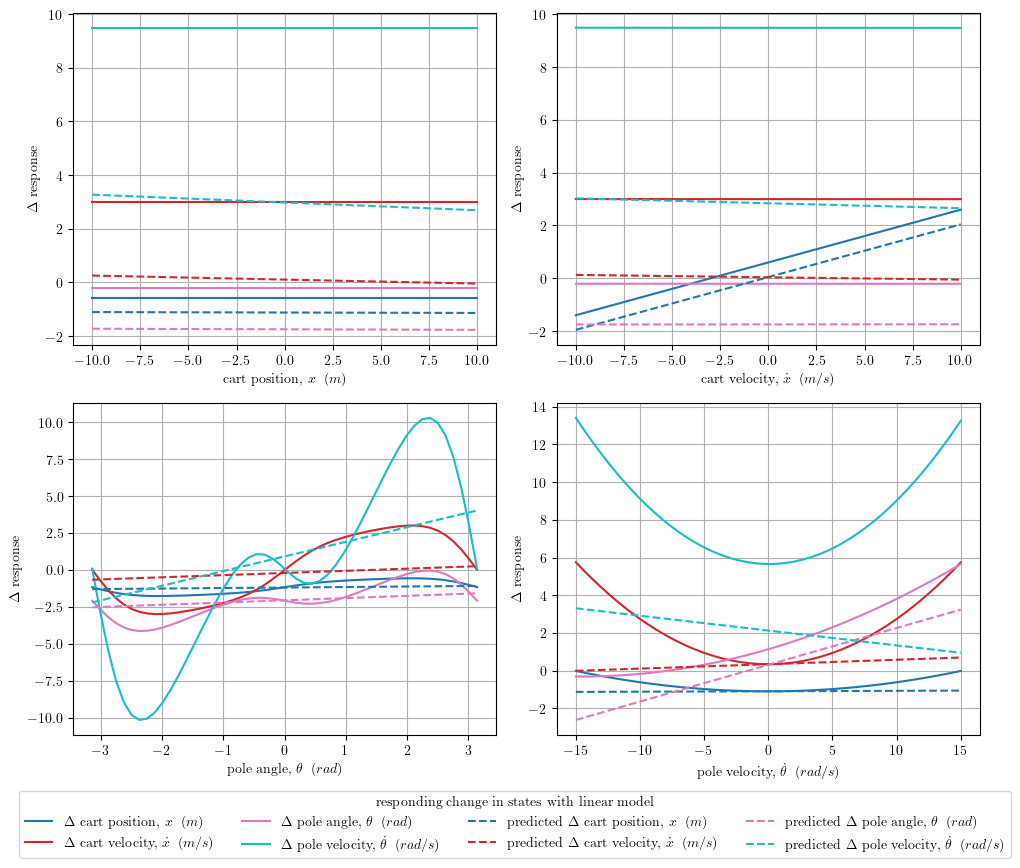

In [131]:
# Model change instead
n = 50

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

xlabels = [STATE0, STATE1, STATE2, STATE3] * 2
n_c = 4
colors = plt.cm.tab10(np.linspace(0,1,n_c))
print([POS, VEL, ANG, ANG_VEL])
for i, x in enumerate([poss, vels, angs, ang_vels]):  
    cp = CartPole(False)
    cp.sim_steps = 1
    # cp.delta_time = 0.05
    y = np.zeros(4)
    y_hat = np.zeros(4)

    for var in x:
        state = [POS, VEL, ANG, ANG_VEL]
        state[i] = var
        y0 = np.array(state)
        cp.setState(y0)
        cp.performAction()
        y = np.vstack([y, cp.getState() - y0])
        y_hat = np.vstack([y_hat, y0 @ W])
        cp.reset()
    
    y = y[1:, :]
    y_hat = y_hat[1:, :]
    ax = axs[i // 2][i % 2]
    ax.grid()
    plot_all_states_in_a_subplot_1_3(x, y, fig=fig, ax=ax, xlabel=xlabels[i], ylabel=f"{DELTA} response", colors=colors, linestyle='solid')
    plot_all_states_in_a_subplot_1_3(x, y_hat, fig=fig, ax=ax, xlabel=xlabels[i], ylabel=f"{DELTA} response", colors=colors, linestyle='dashed')

label1 = [DELTA + l for l in xlabels[:4]]
label2 = ["predicted " + DELTA + l for l in xlabels[:4]]
fig.legend(bbox_to_anchor=(0.52, -0.08), loc="lower center", borderaxespad=0, ncol=4, labels=label1+label2, title='responding change in states with linear model')
fig.tight_layout()
fig.savefig("./assets/task1_3__6.pgf")


Check if linear model fits well for small oscillations

[0.02700723 0.07547719 0.07622419 0.2162395 ]


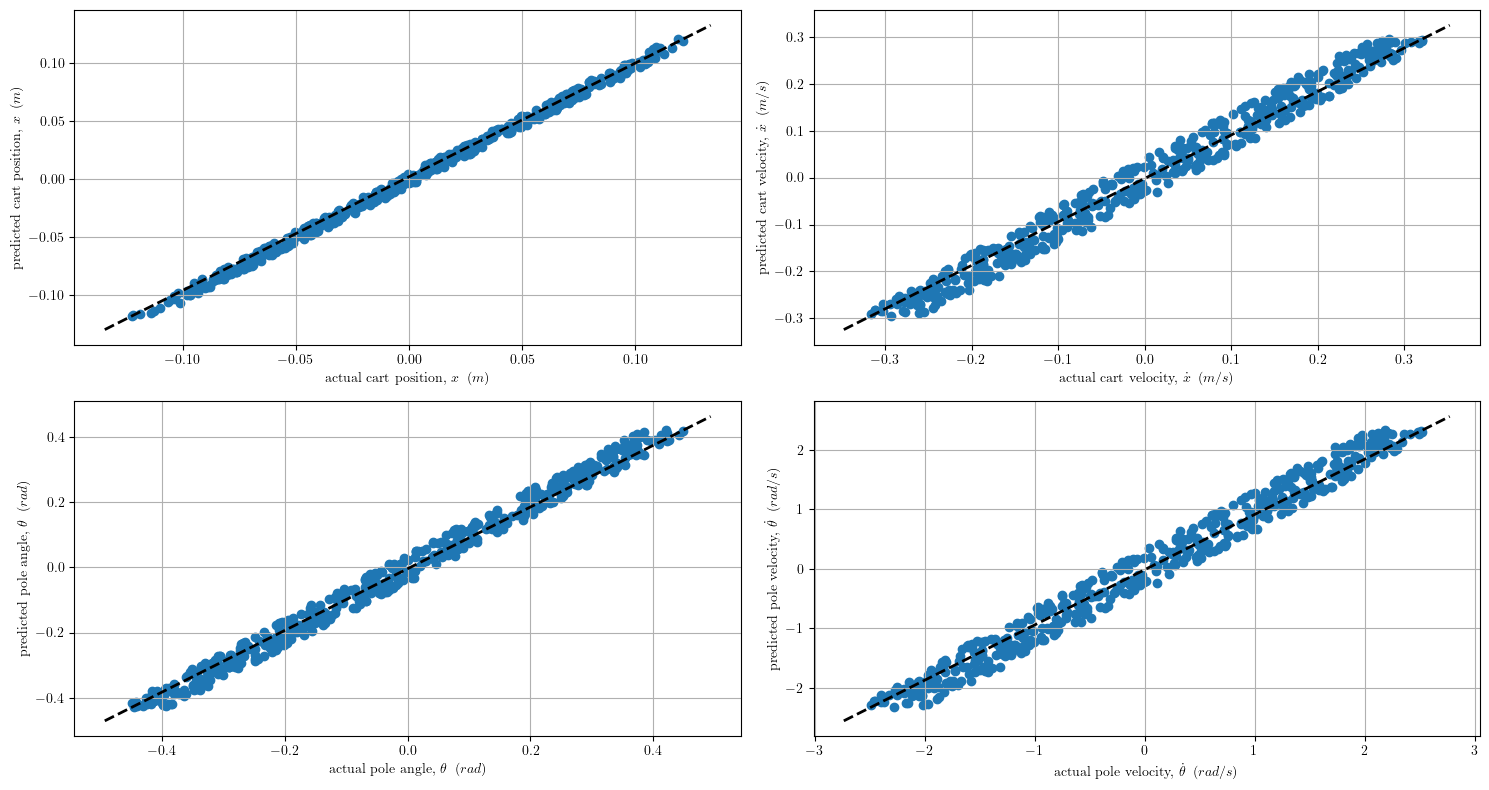

In [73]:
n = 500
rng = default_rng(10)

X0 = (rng.random(n) + -0.5) + STABLE_POS
X1 = (rng.random(n) + -0.5) + STABLE_VEL
X2 = (rng.random(n) * 0.1 + -0.05) + STABLE_ANG
X3 = (rng.random(n) * 6 + -3) + STABLE_ANG_VEL

X = np.array([X0, X1, X2, X3]).T
Y = np.apply_along_axis(simulate, axis=1, arr=X)

Wl = np.linalg.inv(X.T @ X) @ X.T @ Y
Wl.shape

X_hat = X @ Wl
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

s = Y.shape[0]
e = X_hat - Y
mse = np.sum(e.T @ e, axis=0) / s
rmse = np.sqrt(mse)
print(rmse)

labels = [STATE0, STATE1, STATE2, STATE3]
xlabels = ["actual " + l for l in labels]
ylabels = ["predicted " + l for l in labels]
plot_scatter(x=Y, y=X_hat, fig=fig, axs=axs, ylabels=ylabels, xlabels=xlabels)

fig.tight_layout()
fig.savefig("./assets/task1_3__11.png")


### Task 1.4


#### Pole angle against pole velocity

3.141592653589793 3.141592653589793


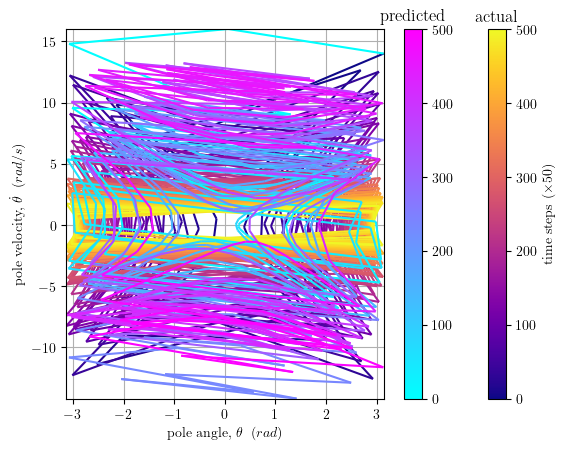

In [105]:
# Complete oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 14])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 2], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 2], pred_response[:, 3]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE2)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_4__1.png")

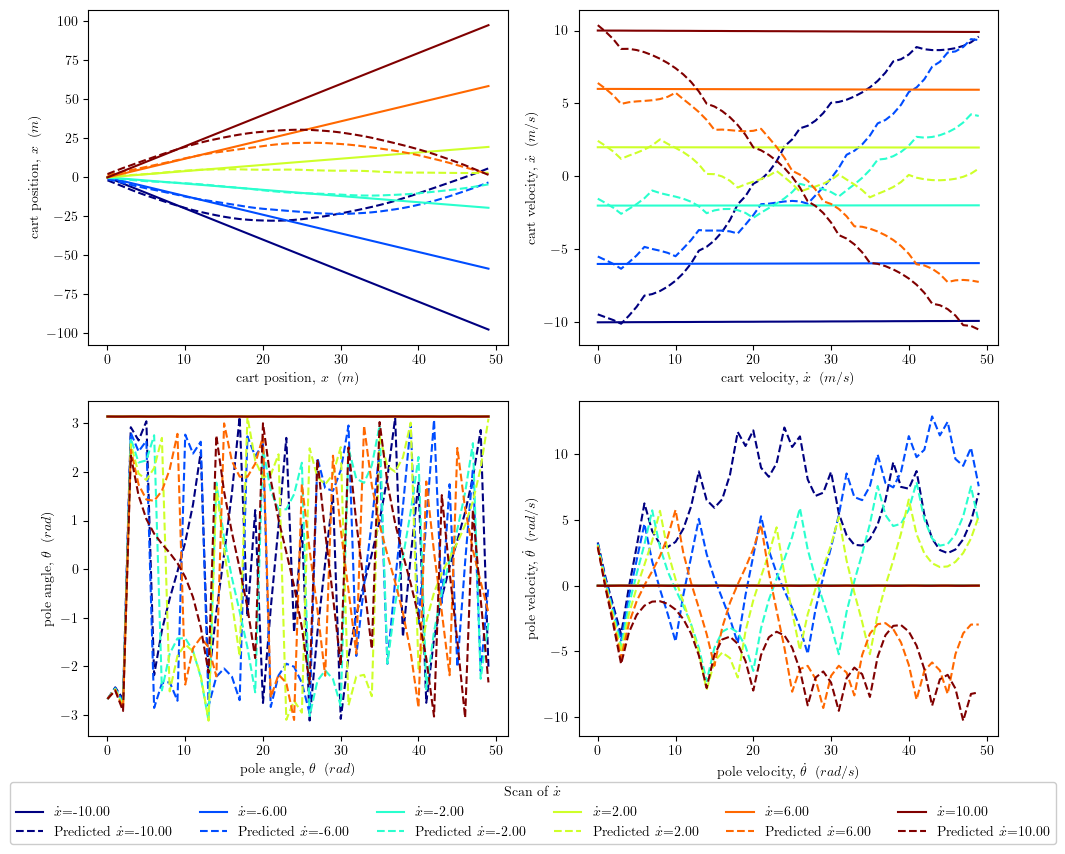

In [28]:

cp = CartPole(False)
cp.sim_steps = 1

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
colors = plt.cm.jet(np.linspace(0, 1, 6))

x = steps = np.arange(50)

for i, vel in enumerate(VEL_RANGE):
    y = np.zeros(4)
    
    state = np.array([STABLE_POS, vel, STABLE_ANG, STABLE_ANG_VEL])
    y_hat = np.expand_dims(state, axis=0)

    cp.setState(state)
    for _ in steps:
        y = np.vstack([y, cp.getState()])
        t = y_hat[-1, :] @ W + y_hat[-1, :]
        t[2] = remap_angle(t[2])
        y_hat = np.vstack([y_hat, t])
        cp.performAction()
    y = y[1:, :]
    y_hat = y_hat[1:, :]
    plot_states(x, y, fig=fig, axs=axs, xlabel=r"time steps ($\times 50$)", label=f"$\dot x$={vel:.2f}", color=colors[i])
    plot_states(x, y_hat, fig=fig, axs=axs, label=f"Predicted $\dot x$={vel:.2f}", color=colors[i], linestyle='dashed')
    cp.reset()

fig.legend(loc="lower center", ncol=6, framealpha=1, title="Scan of $\dot x$", bbox_to_anchor=(0.52, -0.07))
fig.tight_layout()

fig.savefig("./assets/task1_4__20.png")

(100,) (100, 4)


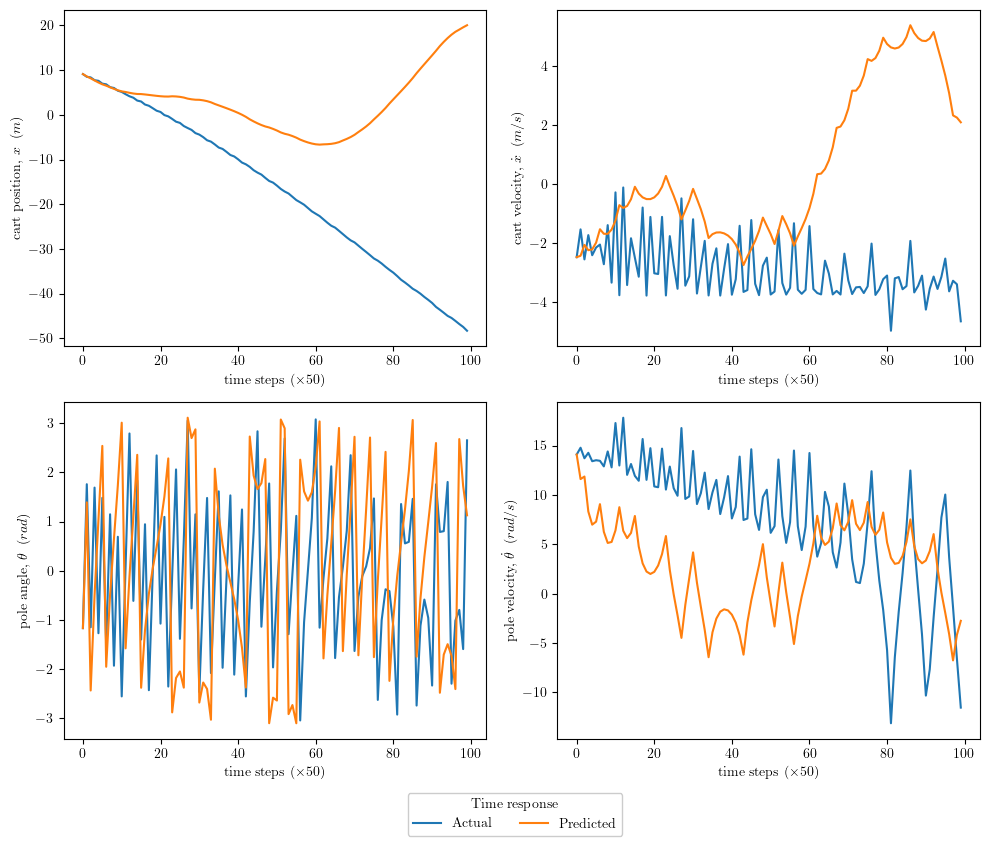

In [106]:
cp = CartPole(False)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
# state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 14])

state = np.array([ 9.12003419, -2.48039464, -1.16777368,  14.09427402])

n_steps = 100
x = steps = np.arange(n_steps)

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)

y20 = response[:-1, :]
y20_hat = pred_response[:-1, :]
print(x.shape, y20.shape)

plot_states(x, y20, fig=fig, axs=axs, xlabel=r"time steps ($\times 50$)", label=f"Actual")
plot_states(x, y20_hat, fig=fig, axs=axs, xlabel=r"time steps ($\times 50$)", label=f"Predicted")

lgd = fig.legend(loc="lower center", ncol=n, framealpha=1, title="Time response", bbox_to_anchor=(0.52, -0.06))
fig.tight_layout()
fig.savefig("./assets/task1_4__21.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

(100,) (100, 4)


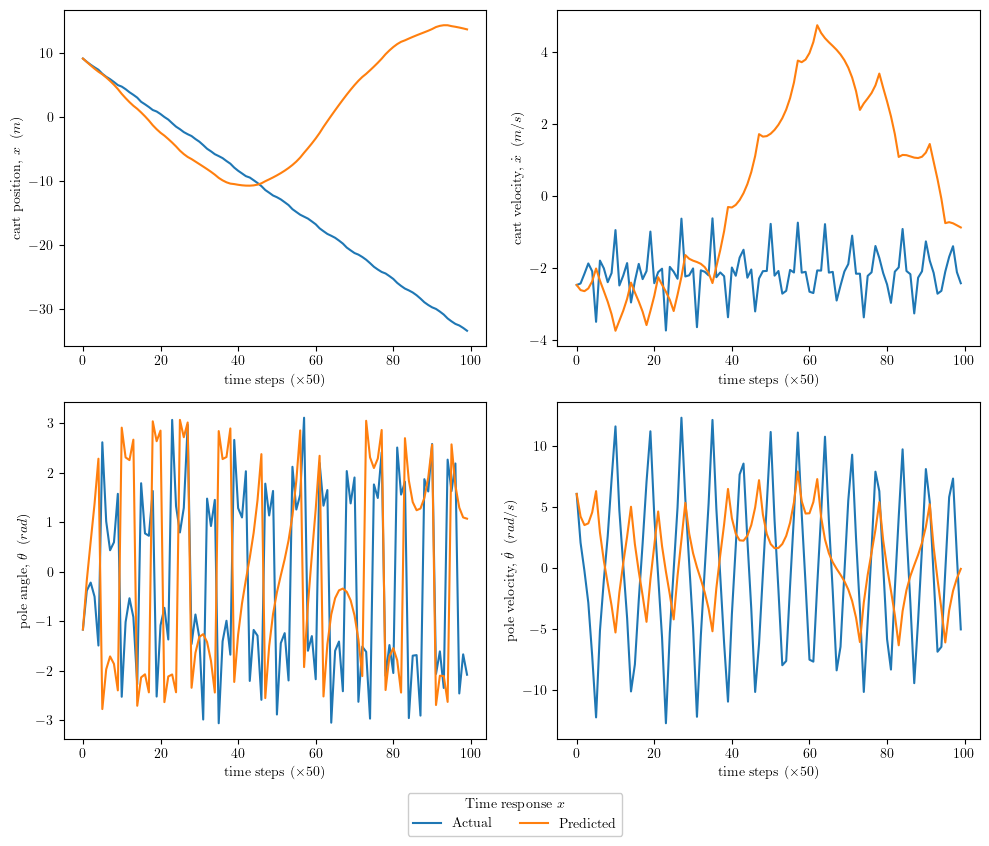

In [107]:
cp = CartPole(False)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
# state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 14])

state = np.array([ 9.12003419, -2.48039464, -1.16777368,  6.09427402])
n_steps = 100
x = steps = np.arange(n_steps)

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)

y20 = response[:-1, :]
y20_hat = pred_response[:-1, :]
print(x.shape, y20.shape)

plot_states(x, y20, fig=fig, axs=axs, xlabel=r"time steps ($\times 50$)", label=f"Actual")
plot_states(x, y20_hat, fig=fig, axs=axs, xlabel=r"time steps ($\times 50$)", label=f"Predicted")

lgd = fig.legend(loc="lower center", ncol=n, framealpha=1, title="Time response $x$", bbox_to_anchor=(0.52, -0.06))
fig.tight_layout()
fig.savefig("./assets/task1_4__22.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

3.141592653589793 3.141592653589793


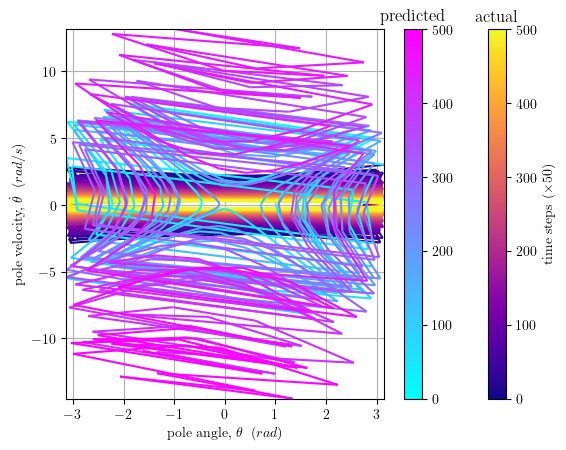

In [108]:
# Simple oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 3])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 2], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 2], pred_response[:, 3]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE2)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_4__2.png")

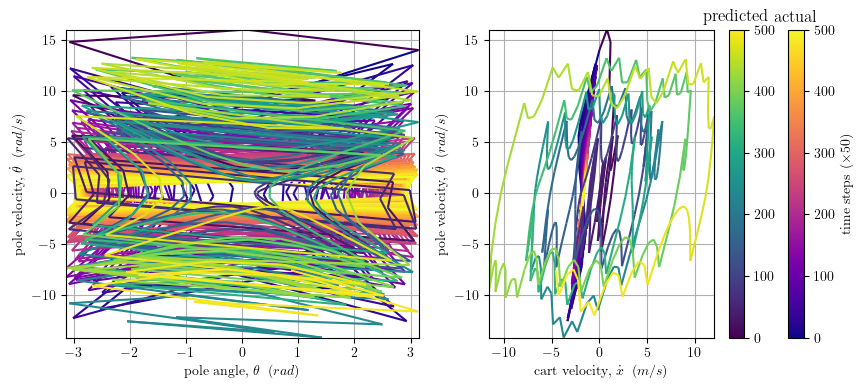

In [109]:
# Complete oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 14])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 2], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 2], pred_response[:, 3]

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments00 = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc00 = LineCollection(segments00, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc00.set_array(steps)
line = axs[0].add_collection(lc00)

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments00 = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc00 = LineCollection(segments00, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc00.set_array(steps)
line = axs[0].add_collection(lc00)

axs[0].set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
axs[0].set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

axs[0].set_xlabel(STATE2)
axs[0].set_ylabel(STATE3)
axs[0].grid()

x01, y01 = response[:, 1], response[:, 3]
x_hat01, y_hat01 = pred_response[:, 1], pred_response[:, 3]

points = np.array([x01, y01]).T.reshape(-1, 1, 2)
segments01 = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc01 = LineCollection(segments01, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc01.set_array(steps)
line = axs[1].add_collection(lc01)
cb = fig.colorbar(line, ax=axs[1], label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat01, y_hat01]).T.reshape(-1, 1, 2)
segments01 = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc01 = LineCollection(segments01, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc01.set_array(steps)
line = axs[1].add_collection(lc01)
cb = fig.colorbar(line, ax=axs[1])
cb.ax.set_title('predicted')


axs[1].set_xlim(min(x01.min(), x_hat01.min()), max(x01.max(), x_hat01.max()))
axs[1].set_ylim(min(y01.min(), y_hat01.min()), max(y01.max(), y_hat01.max()))


axs[1].set_xlabel(STATE1)
axs[1].set_ylabel(STATE3)
axs[1].grid()

fig.savefig("./assets/task1_4__10.png")



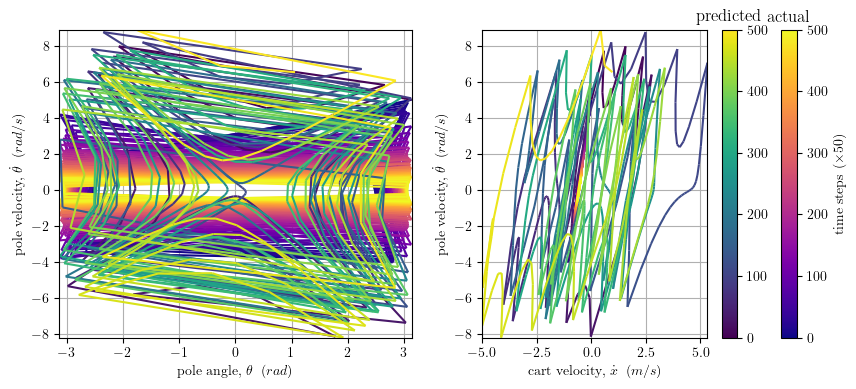

In [110]:
# Simple oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 5])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 2], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 2], pred_response[:, 3]

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments00 = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc00 = LineCollection(segments00, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc00.set_array(steps)
line = axs[0].add_collection(lc00)

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments00 = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc00 = LineCollection(segments00, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc00.set_array(steps)
line = axs[0].add_collection(lc00)

axs[0].set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
axs[0].set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

axs[0].set_xlabel(STATE2)
axs[0].set_ylabel(STATE3)
axs[0].grid()

x01, y01 = response[:, 1], response[:, 3]
x_hat01, y_hat01 = pred_response[:, 1], pred_response[:, 3]

points = np.array([x01, y01]).T.reshape(-1, 1, 2)
segments01 = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc01 = LineCollection(segments01, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc01.set_array(steps)
line = axs[1].add_collection(lc01)
cb = fig.colorbar(line, ax=axs[1], label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat01, y_hat01]).T.reshape(-1, 1, 2)
segments01 = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc01 = LineCollection(segments01, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc01.set_array(steps)
line = axs[1].add_collection(lc01)
cb = fig.colorbar(line, ax=axs[1])
cb.ax.set_title('predicted')


axs[1].set_xlim(min(x01.min(), x_hat01.min()), max(x01.max(), x_hat01.max()))
axs[1].set_ylim(min(y01.min(), y_hat01.min()), max(y01.max(), y_hat01.max()))


axs[1].set_xlabel(STATE1)
axs[1].set_ylabel(STATE3)
axs[1].grid()

fig.savefig("./assets/task1_4__11.png")



#### Cart velocity against pole velocity

0.0 0.0


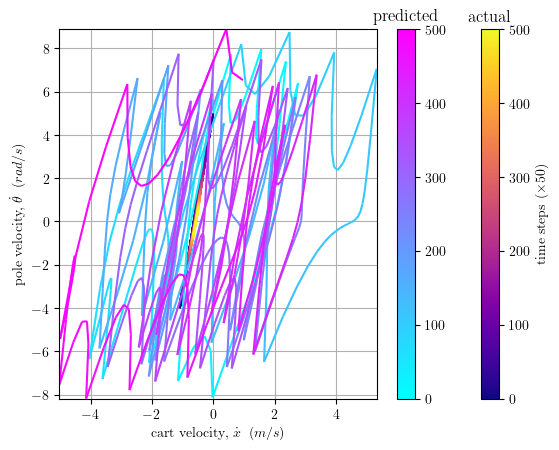

In [ ]:
# Simple oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 5])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 1], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 1], pred_response[:, 3]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_4__3.png")

0.0 0.0


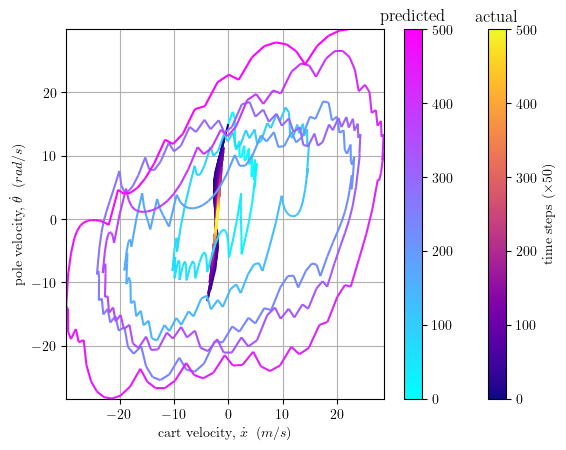

In [ ]:
# Complete oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 15])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 1], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 1], pred_response[:, 3]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_4__4.png")

#### Cart position against pole angle

0.0 0.0


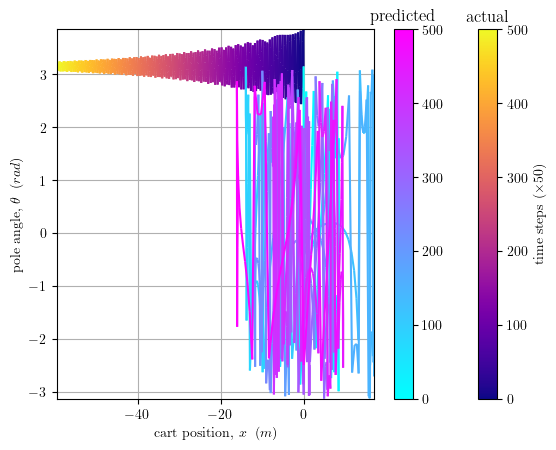

In [ ]:
# Simple oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 5])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 0], response[:, 2]
x_hat00, y_hat00 = pred_response[:, 0], pred_response[:, 2]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE0)
ax.set_ylabel(STATE2)
ax.grid()
fig.savefig("./assets/task1_4__5.pgf")

0.0 0.0


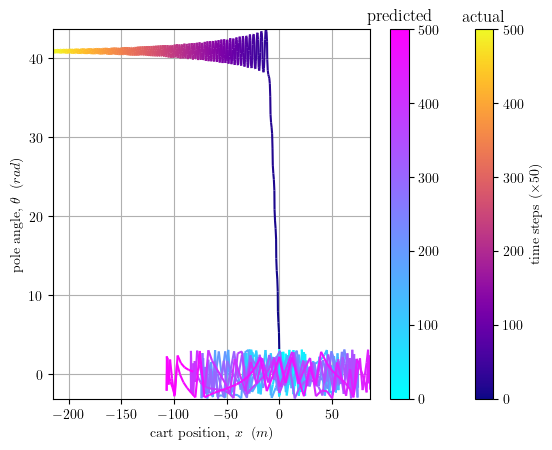

In [ ]:
# Complete oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 15])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 0], response[:, 2]
x_hat00, y_hat00 = pred_response[:, 0], pred_response[:, 2]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE0)
ax.set_ylabel(STATE2)
ax.grid()
fig.savefig("./assets/task1_4__6.pgf")

#### Cart veloctiy against pole angle

0.0 0.0


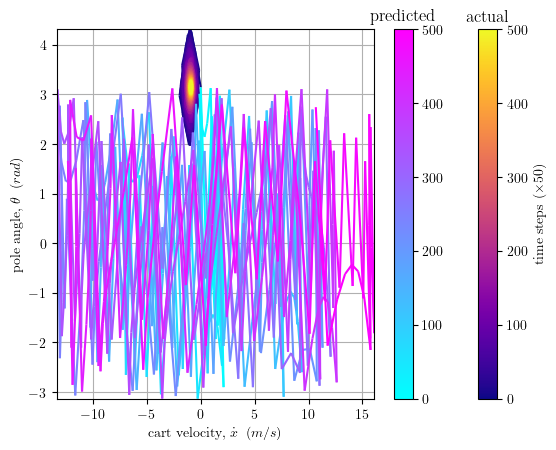

In [ ]:
# Simple oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 8])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 1], response[:, 2]
x_hat00, y_hat00 = pred_response[:, 1], pred_response[:, 2]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE2)
ax.grid()
fig.savefig("./assets/task1_4__7.pgf")

0.0 0.0


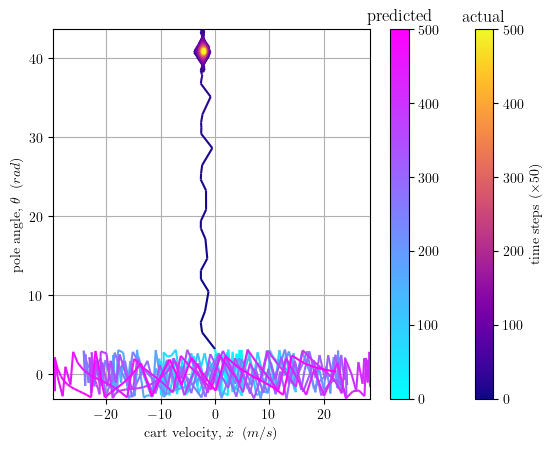

In [ ]:
# Complete oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 15])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 1], response[:, 2]
x_hat00, y_hat00 = pred_response[:, 1], pred_response[:, 2]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE2)
ax.grid()
fig.savefig("./assets/task1_4__8.pgf")

15.0 15.0


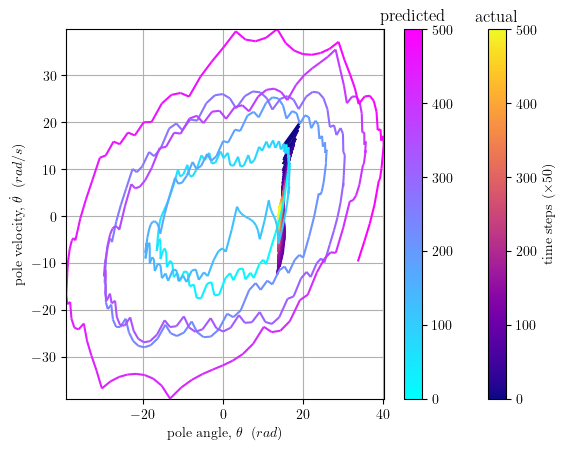

In [ ]:
# Complete oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, 15, 0.1, 15])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 1], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 1], pred_response[:, 3]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE2)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_4__10.pgf")

In [ ]:
cp = CartPole(False)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
colors = plt.cm.jet(np.linspace(0, 1, n))

x = steps = np.arange(50)

for i, vel in enumerate(VEL_RANGE):
    y = np.zeros(4)
    state = np.array([STABLE_POS, vel, STABLE_ANG, STABLE_ANG_VEL])
    cp.setState(state)
    for _ in steps:
        y = np.vstack([y, cp.getState()])
        cp.performAction()
    y = y[1:, :]
    plot_states(x, y, fig=fig, axs=axs, xlabel=r"time steps ($\times 50$)", label=f"$\dot x$={vel:.2f}", color=colors[i])
    cp.reset()

print(y.shape)
fig.legend(loc="lower center", ncol=n, framealpha=1, title="Scan of $\dot x$", bbox_to_anchor=(0.52, -0.06))
fig.tight_layout()

fig.savefig("./assets/task1_1__1.png")

## Task 2

In [ ]:
n = 500
rng = default_rng(10)

X0 = rng.random(n) * (POS_HIGH - POS_LOW) + POS_LOW
X1 = rng.random(n) * (VEL_HIGH - VEL_LOW) + VEL_LOW
X2 = rng.random(n) * (ANG_HIGH - ANG_LOW) + ANG_LOW
X3 = rng.random(n) * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW

X = np.vstack([X0, X1, X2, X3]).T
print(X.shape)

SIGMA = X.std(axis=0)


XI = rng.choice(X, size=10, replace=False)
print(XI.shape)

(500, 4)
(10, 4)


In [ ]:
def K(X, XI, SIGMA):
    N = X.shape[0]
    # M = W.shape[0]
    def inner(x):
        # print(x.shape)
        # print(XI.shape)
        # print(SIGMA.shape)
        t = np.apply_along_axis(lambda xi: (xi - x) / SIGMA, arr=XI, axis=1)
        # print(t)
        # Add periodicity to angle variable
        t[:, 2] = np.sin(t[:, 2] / 2) ** 2
        # Sum of squares
        t = np.apply_along_axis(lambda y: y.T @ y * 0.5, arr=t, axis=1)
        # print(t)
        return t.T
    exponent = -np.apply_along_axis(inner, axis=1, arr=X)
    return np.exp(exponent)

K_NM = K(X, XI, SIGMA)
K_MM = K(XI, XI, SIGMA)



In [ ]:
def simulate(X):
    cp = CartPole(False)
    cp.setState(X)
    cp.performAction()
    return cp.getState() - X

LAMBDA = 0.5
Y = np.apply_along_axis(simulate, axis=1, arr=X)

W1 = np.linalg.inv(K_NM.T @ K_NM + LAMBDA * K_MM) @ K_NM.T @ Y
W2, residuals, rank, s = np.linalg.lstsq(K_NM, Y)


/var/folders/80/9k30qm0x143dm5hn3w1wtzzm0000gn/T/ipykernel_1371/1818354631.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W2, residuals, rank, s = np.linalg.lstsq(K_NM, Y)


In [ ]:
np.sum(W1 - W2)

-0.26368280055274473